This assignment will be on transforms. Why do we use transforms? Some
operations in the time domain are complicated like convolution sum. If we use
the transform domain the same complicated operations become easy. We will
focus mostly on discrete time signals and their transforms.


**• Z Transform:**
Consider the discrete time sequence x[n] = z n with −∞ < n < ∞ where
z ∈ C.. Let z = 0.95, z = 1.05, z = −1.05, z = −0.97, z = 1, z = −1.
Now plot the sequences for different values of z. For each plot what is the
nature of the plot?

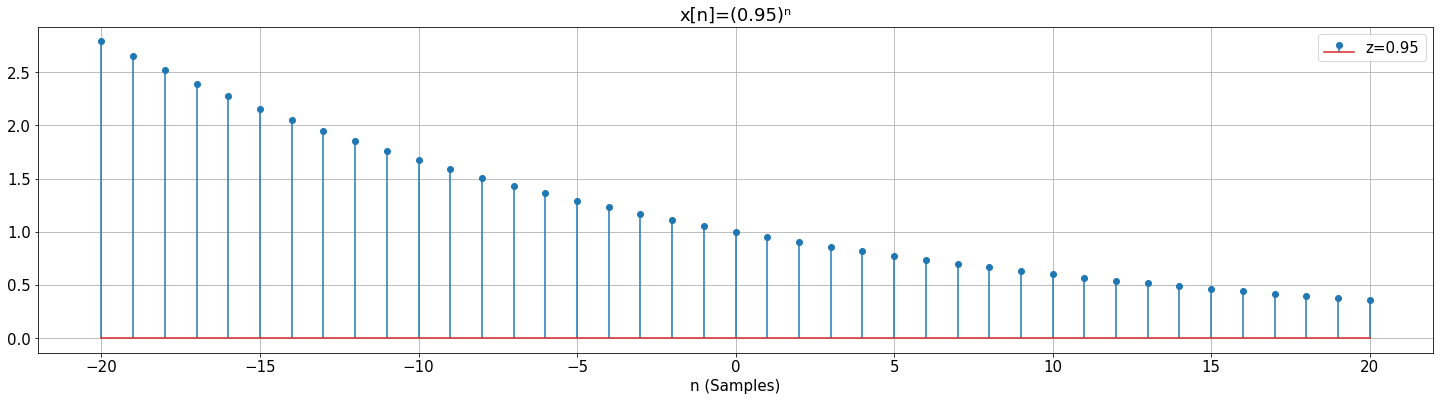

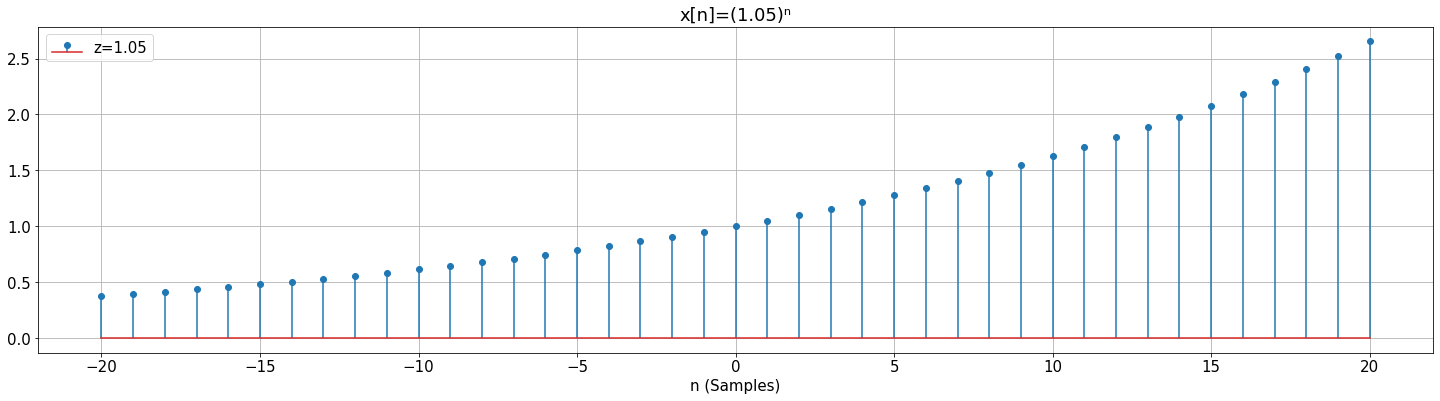

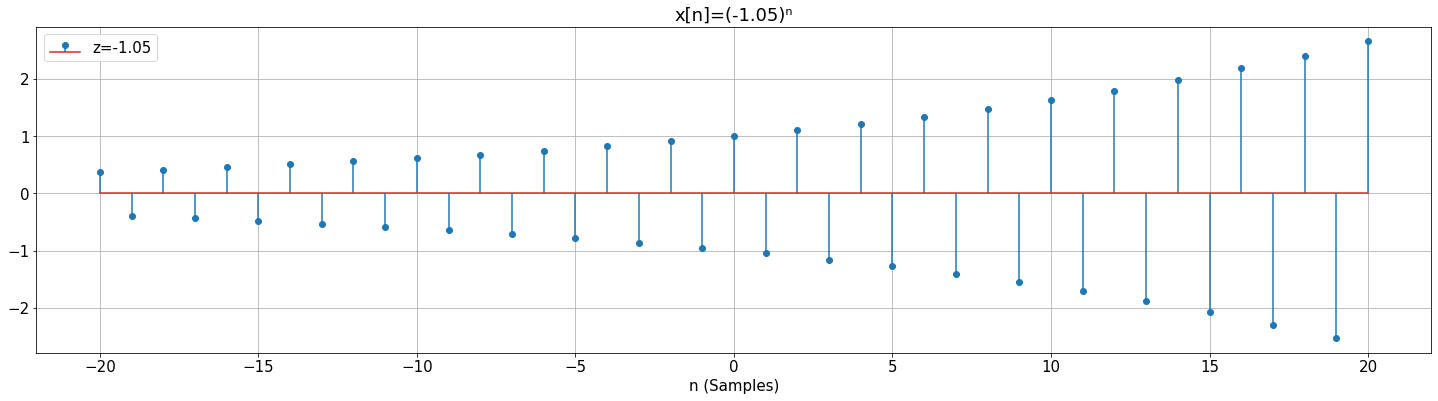

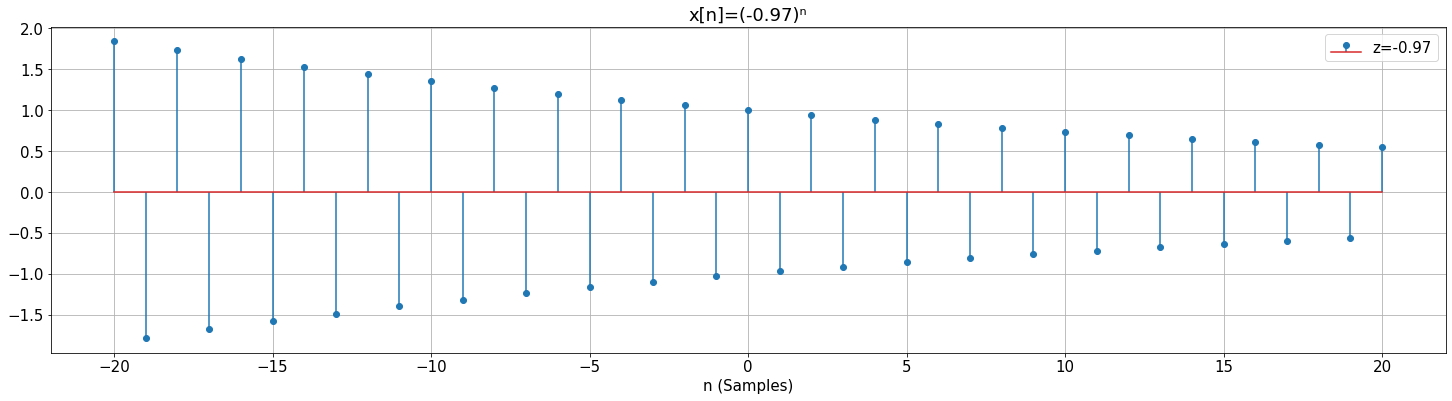

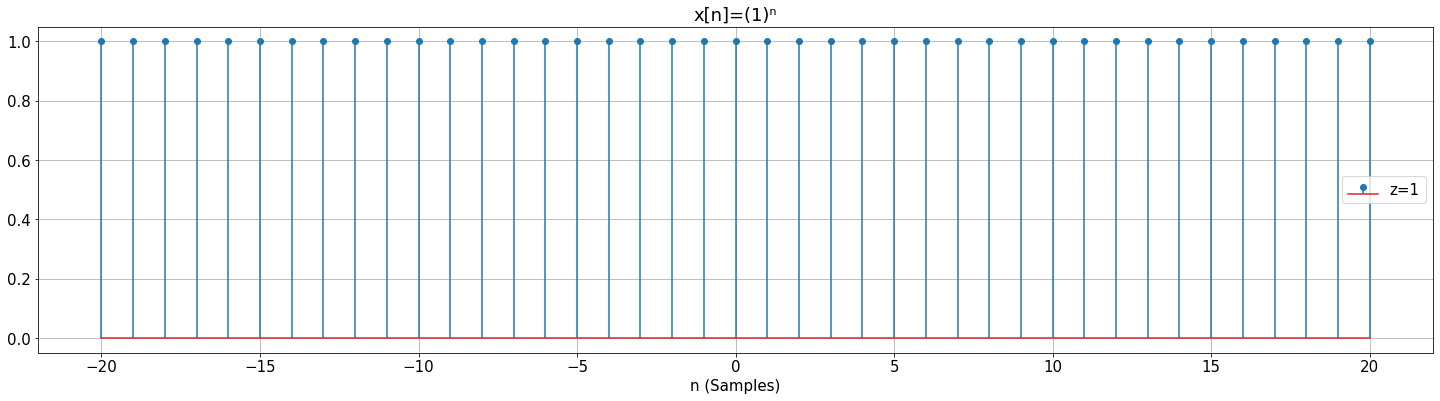

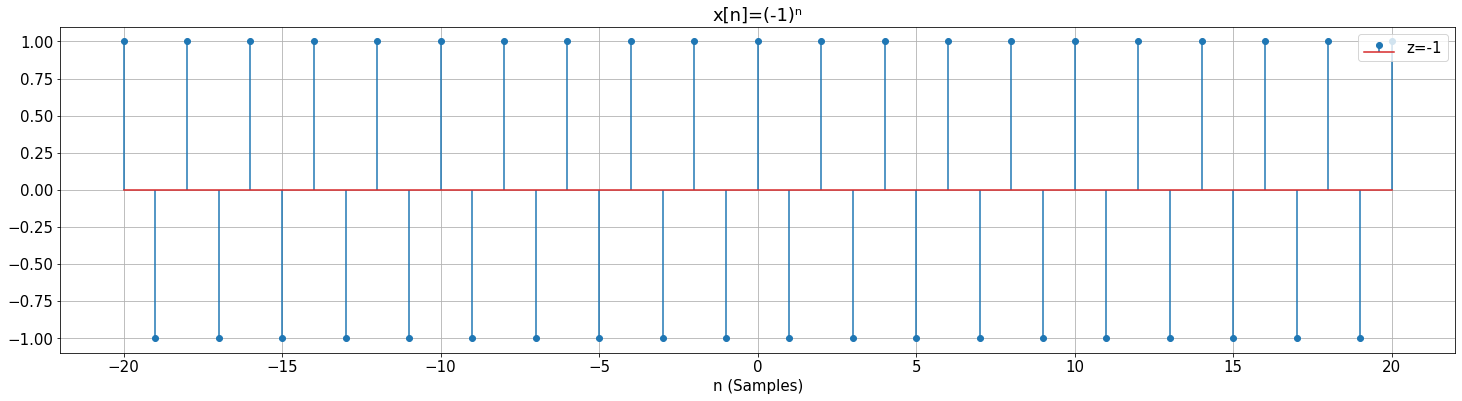

In [18]:
import numpy as np
import matplotlib.pyplot as plt

z_list=[0.95,1.05,-1.05,-0.97,1,-1]
rnge=20
n=np.arange(-rnge,rnge+1,1,dtype=float)
for z in z_list:

  xn=z**n
  plt.rcParams.update({'font.size':15})
  plt.figure(figsize=(25,6))
  plt.stem(n,xn,use_line_collection=True,label=f'z={z}')
  plt.xlabel('n (Samples)')
  #plt.ylabel('Probability value')
  plt.title('x[n]='+f'({z})'+u'\u207F')
  plt.legend()
  plt.grid()
  plt.show()

When z<0, the output samples are oscillating because of the repeated multiplication by the the '-' sign. 

When |z|>0, the amplitude gradually rises, while for |z|<0, it decreases. For |z|=1, it remains constant. 

Now consider the same sequence with complex values of z. Consider z =
−2 + 3j, z = 2 − 3j, z = e jπ/10 , z = 0.95e jπ/10 , z = 1.05e jπ/10 . For these
values of z create 3D plot with both real and imaginary parts. Try using
different markers for real and imaginary parts.

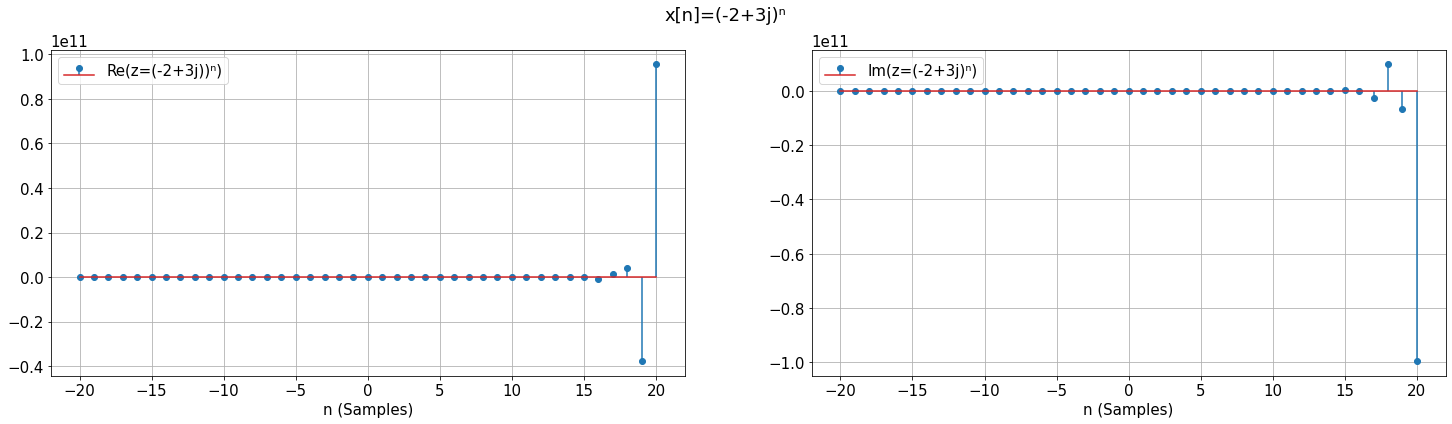

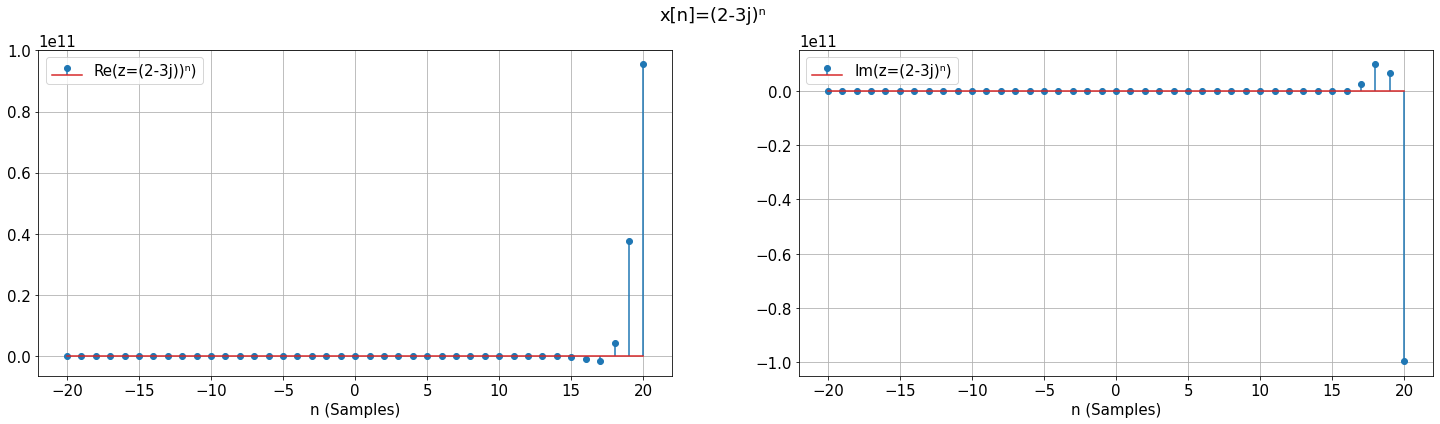

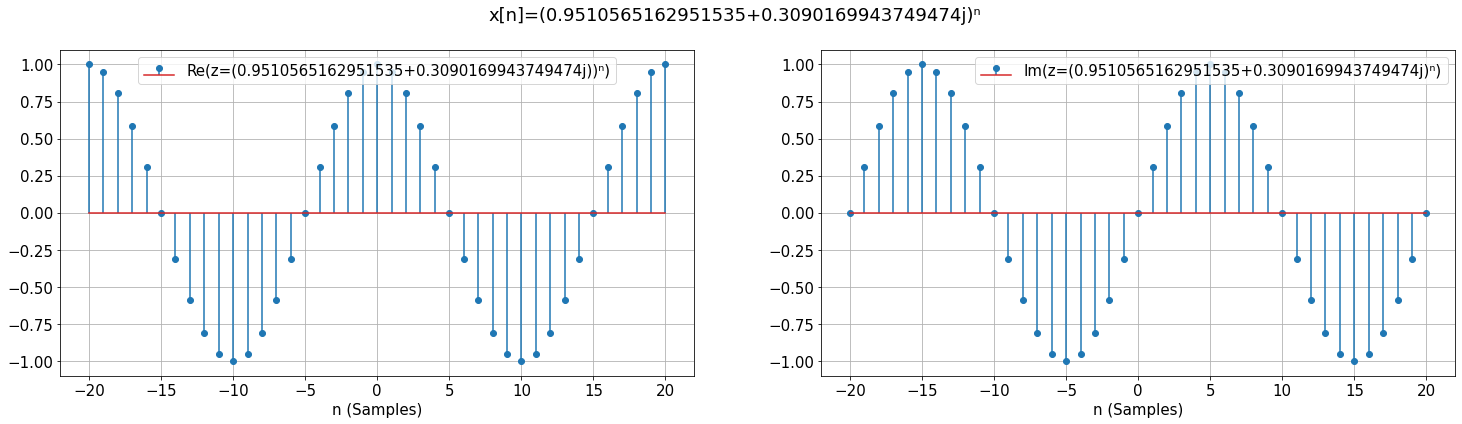

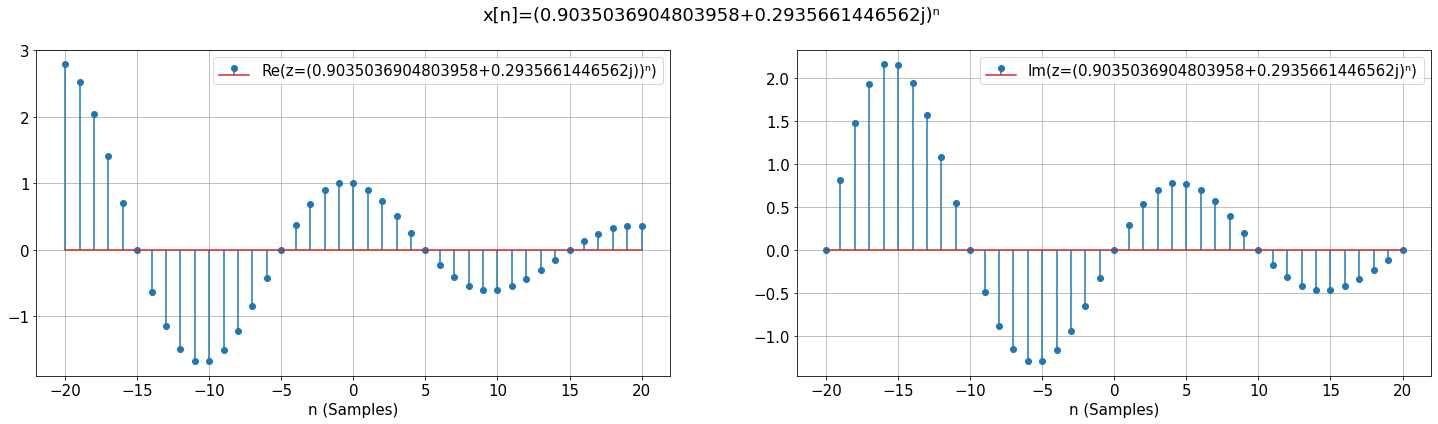

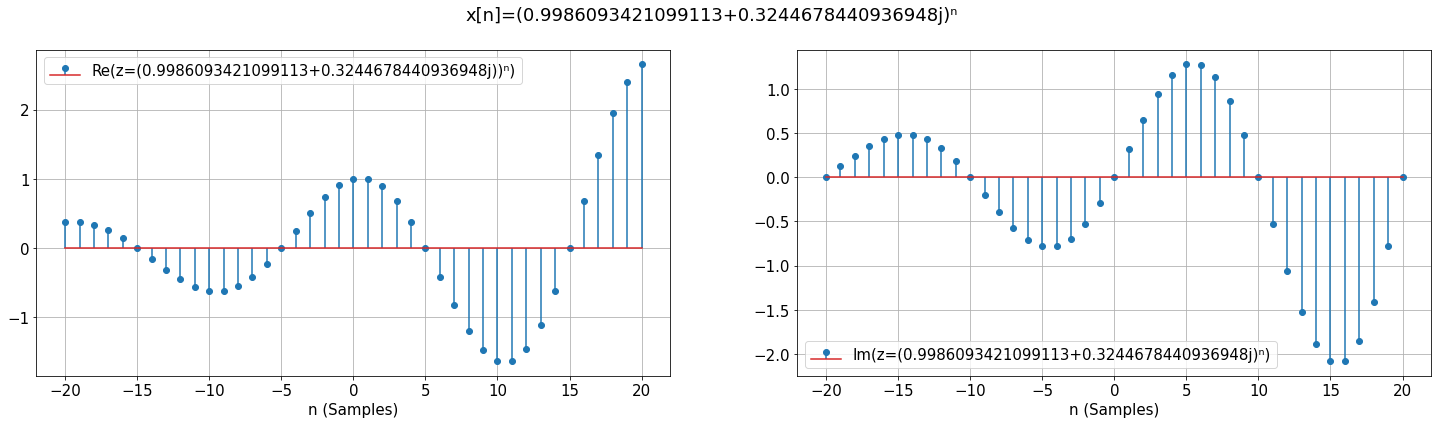

In [37]:
import cmath
import numpy as np
import matplotlib.pyplot as plt


z1=complex(-2,3)
z2=complex(2,-3)
r=np.cos(np.pi/10)
i=np.sin(np.pi/10)
z3=complex(r,i)
z4=0.95*z3
z5=1.05*z3

z_list=[z1,z2,z3,z4,z5]
rnge=20
n=np.arange(-rnge,rnge+1,1,dtype=float)

for z in z_list:
  rl=(z**n).real
  img=(z**n).imag
  fig,ax=plt.subplots(1,2,figsize=(25,6))
  plt.rcParams.update({'font.size':15})
  ax[0].stem(n,rl,use_line_collection=True,label=f'Re(z={z})'+u'\u207F)')
  ax[0].set_xlabel('n (Samples)')
  ax[0].legend()
  ax[0].grid()
  ax[1].stem(n,img,use_line_collection=True,label=f'Im(z={z}'+u'\u207F)')
  ax[1].set_xlabel('n (Samples)')
  ax[1].legend()
  ax[1].grid()
  plt.suptitle('x[n]='+f'{z}'+u'\u207F')

  plt.show()


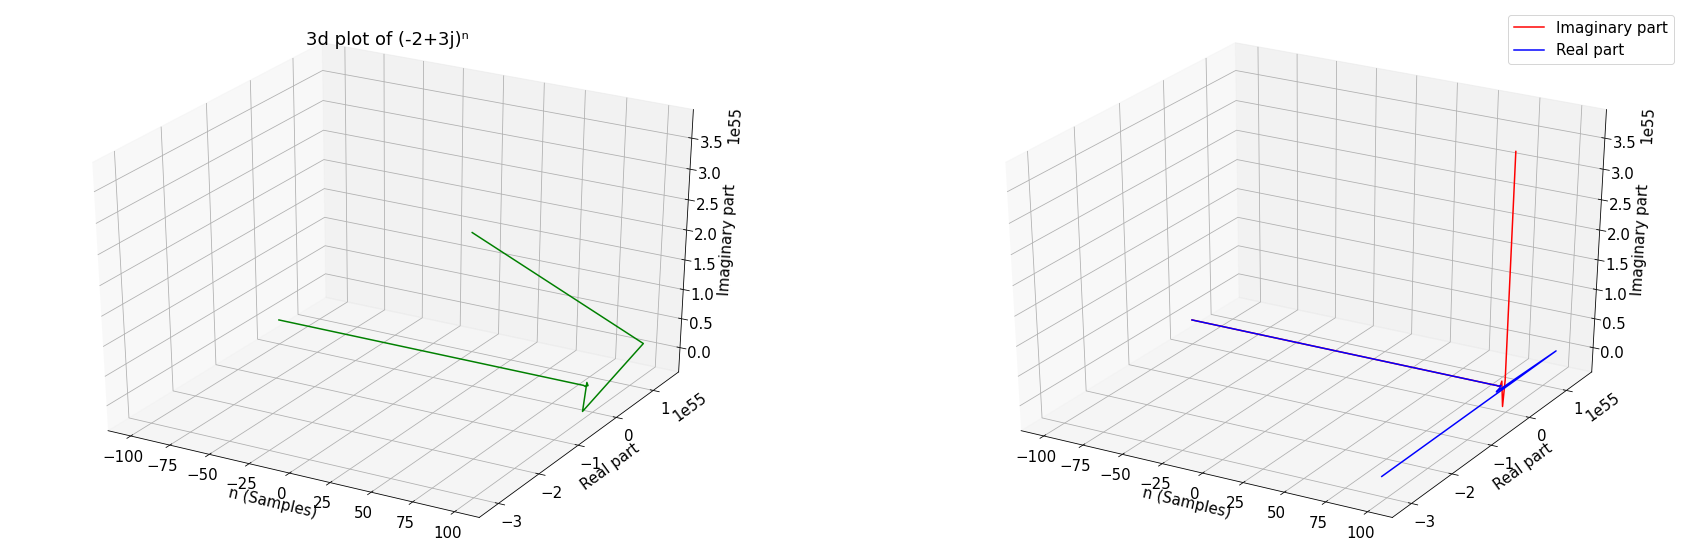

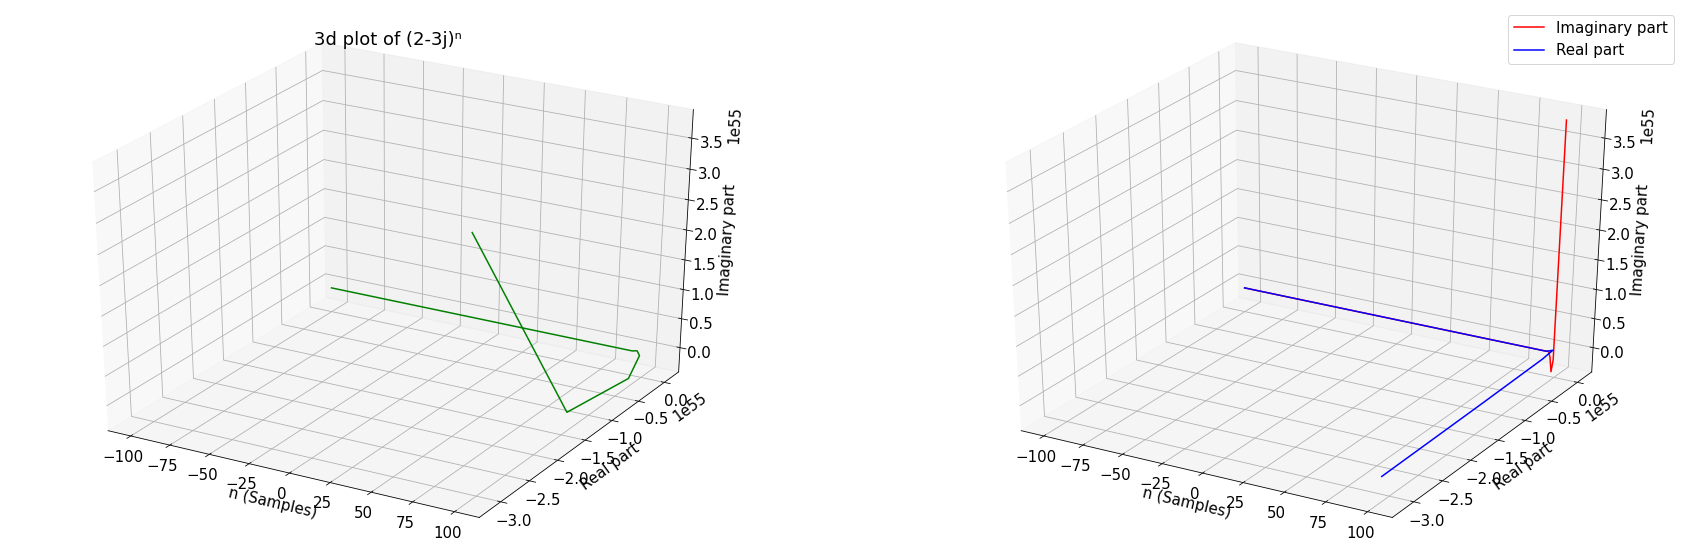

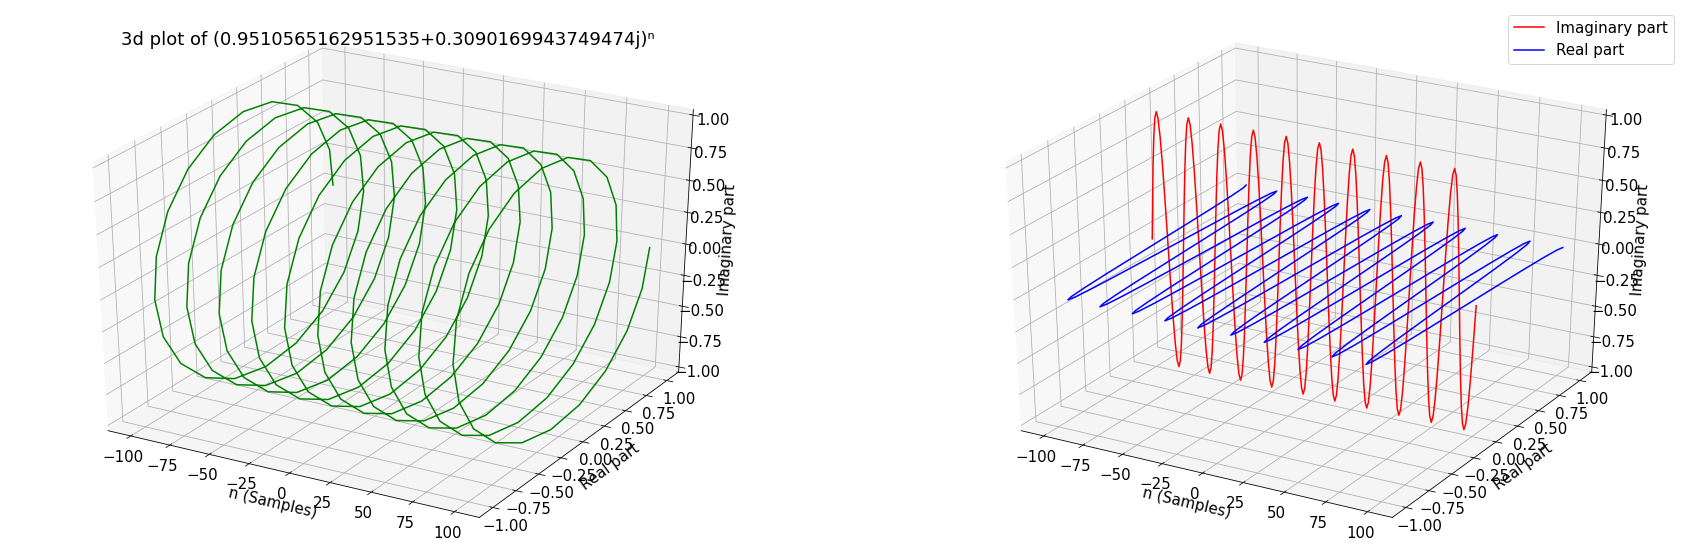

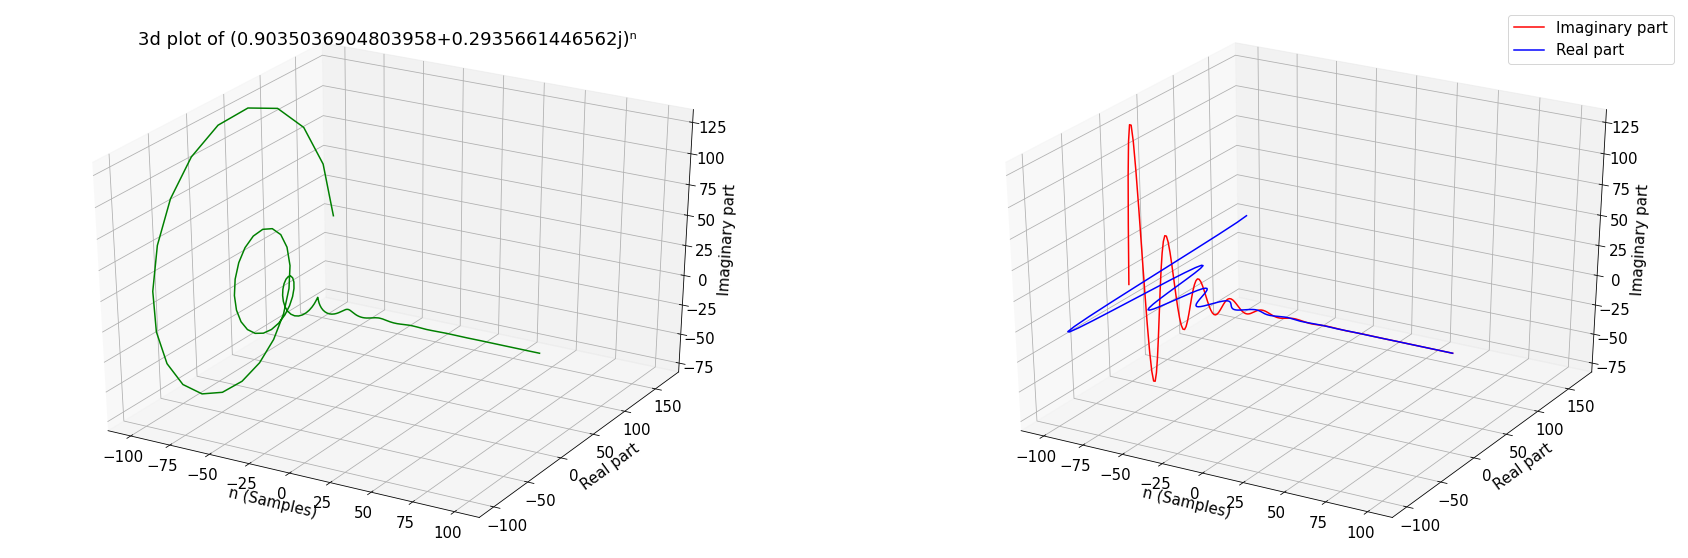

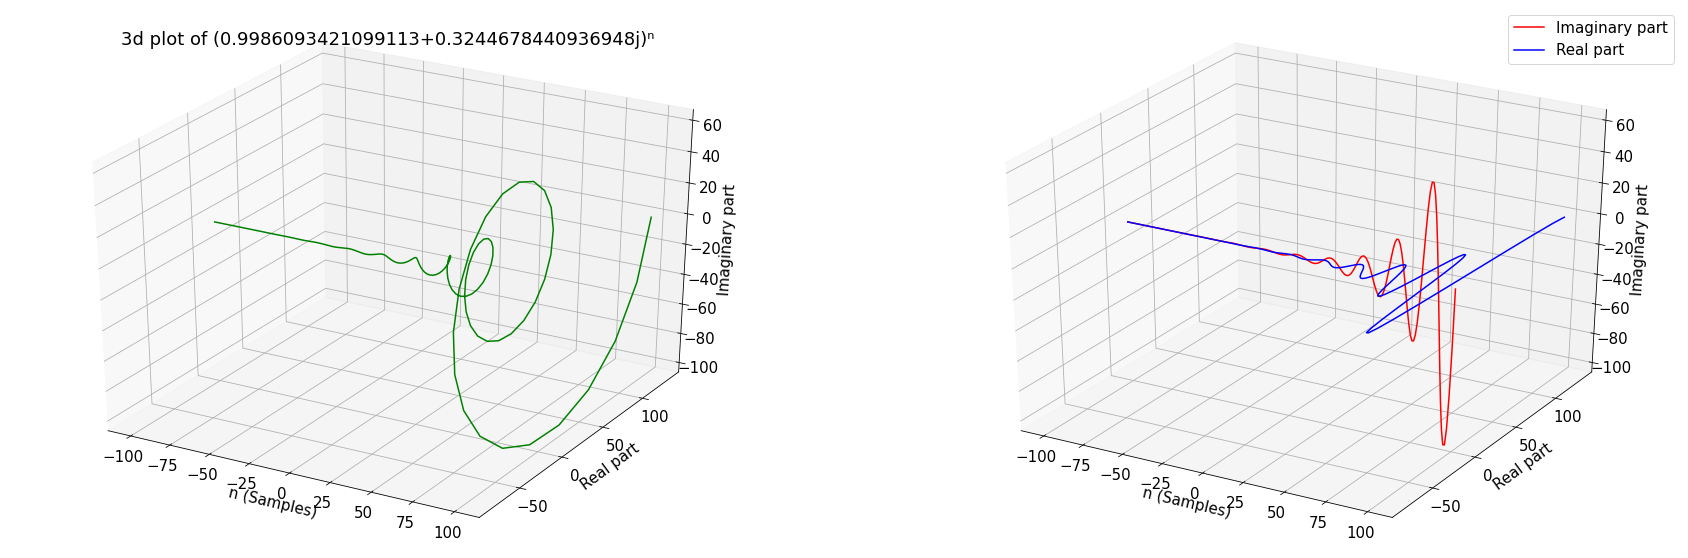

In [68]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
def plt_cmplx_3d(c,n):
  # Creating dataset
  x=n
  rl=(z**n).real
  img=(z**n).imag
  # Creating figure
  plt.rcParams.update({'font.size':15})
  fig = plt.figure(figsize = (30,10))
  #fig = plt.figure(figsize=plt.figaspect(0.5))
  #ax = plt.axes(projection ="3d")

  ax = fig.add_subplot(1, 2, 1, projection='3d')
  # Creating plot
  ax.plot3D(x, rl, img, color = "green")
  ax.set_xlabel('n (Samples)')
  ax.set_ylabel(f'Real part')
  ax.set_zlabel(f'Imaginary part')
  plt.title(f'3d plot of {z}'+u'\u207F')

  ax = fig.add_subplot(1, 2, 2, projection='3d')
  ax.plot3D(x, [0]*np.shape(n)[0], img, color = "red",label='Imaginary part')
  ax.plot3D(x, rl,0, color = "blue",label='Real part')
  ax.set_xlabel('n (Samples)')
  ax.set_ylabel(f'Real part')
  ax.set_zlabel(f'Imaginary part')
  ax.legend()
  
  # show plot
  plt.show()

rnge=100
n=np.arange(-rnge,rnge+1,1,dtype=float)

for z in  z_list:
  plt_cmplx_3d(z,n)


**Conclusion:**

 For plot-4 where r=0.95, we see that the magnitude of both the real and imaginary parts decrease sinusoidally. Similarly for plot-5, r=1.05 and the magnitudes increase sinusoidally. For plot-3, the the amplitude remains constant. For the first 2 plots, the ampitudes increase exponentially with n.

Consider the system y[n] = 2x[n − 3], the input to this system is the
sequence z n where z belong to the sequences in the previous section (all
complex). Find the response of the system. Also find the corresponding
eigen values of the response.

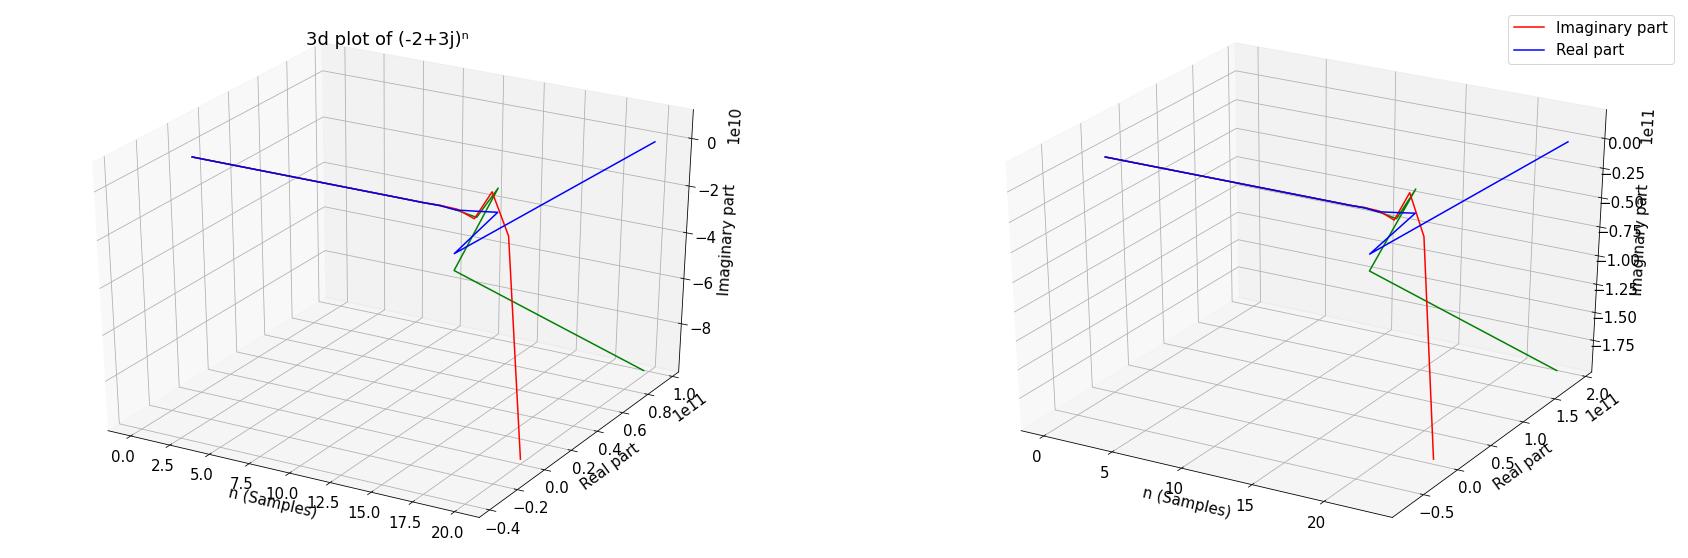

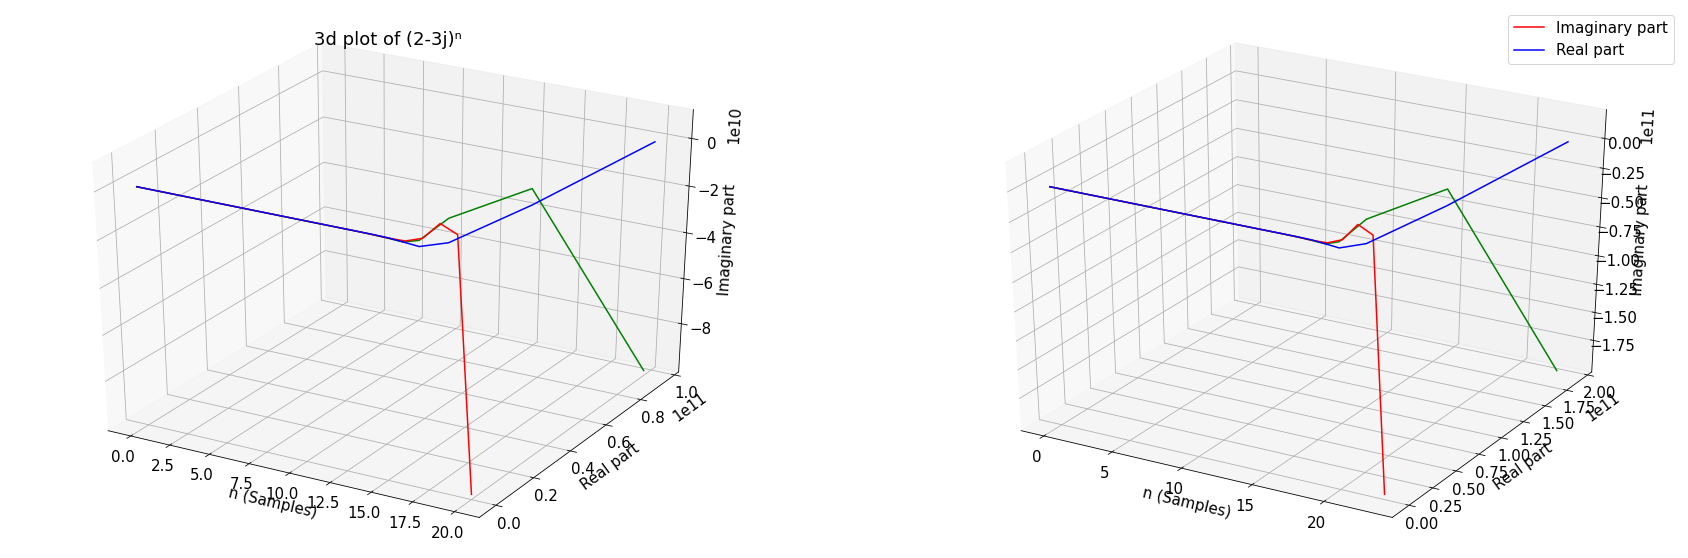

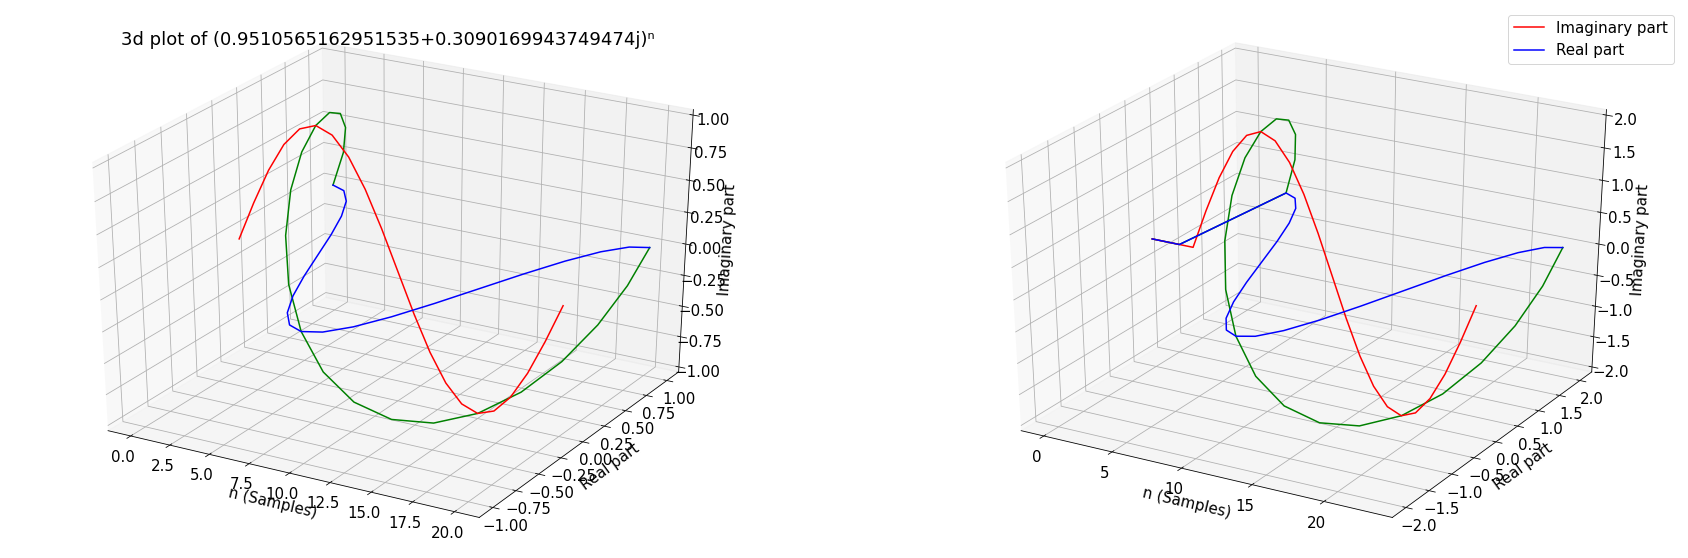

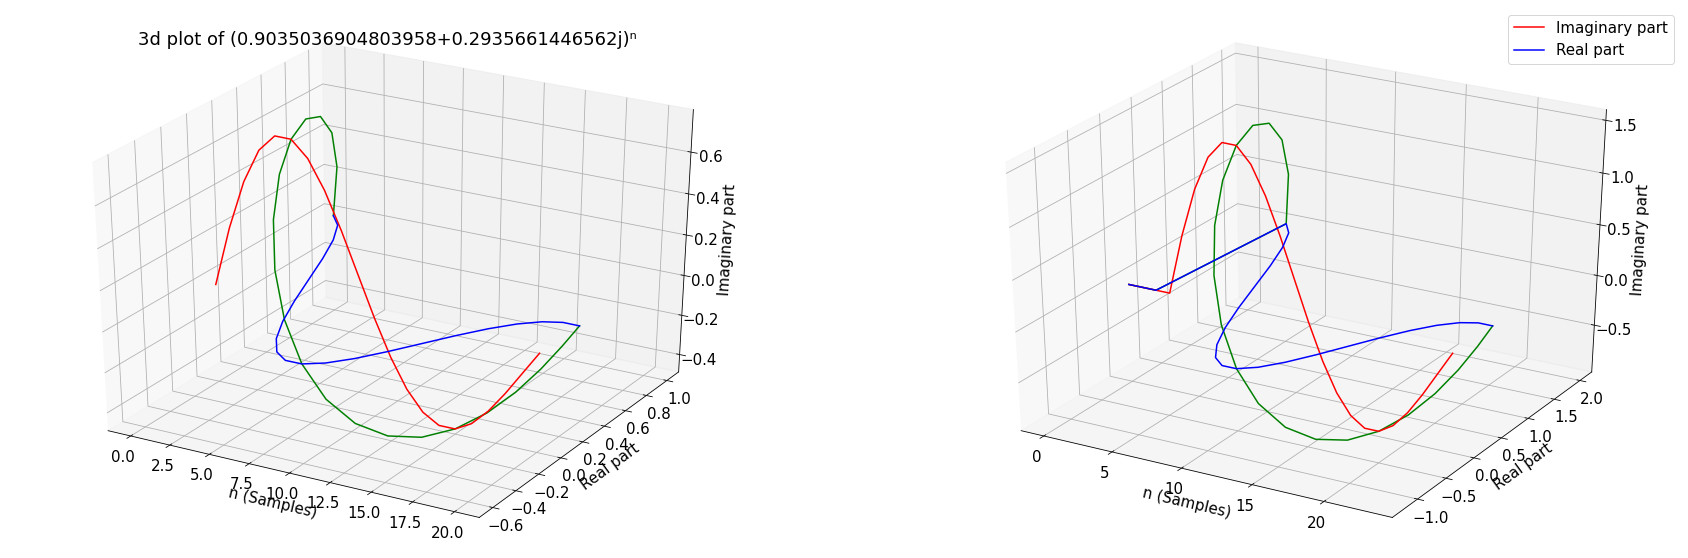

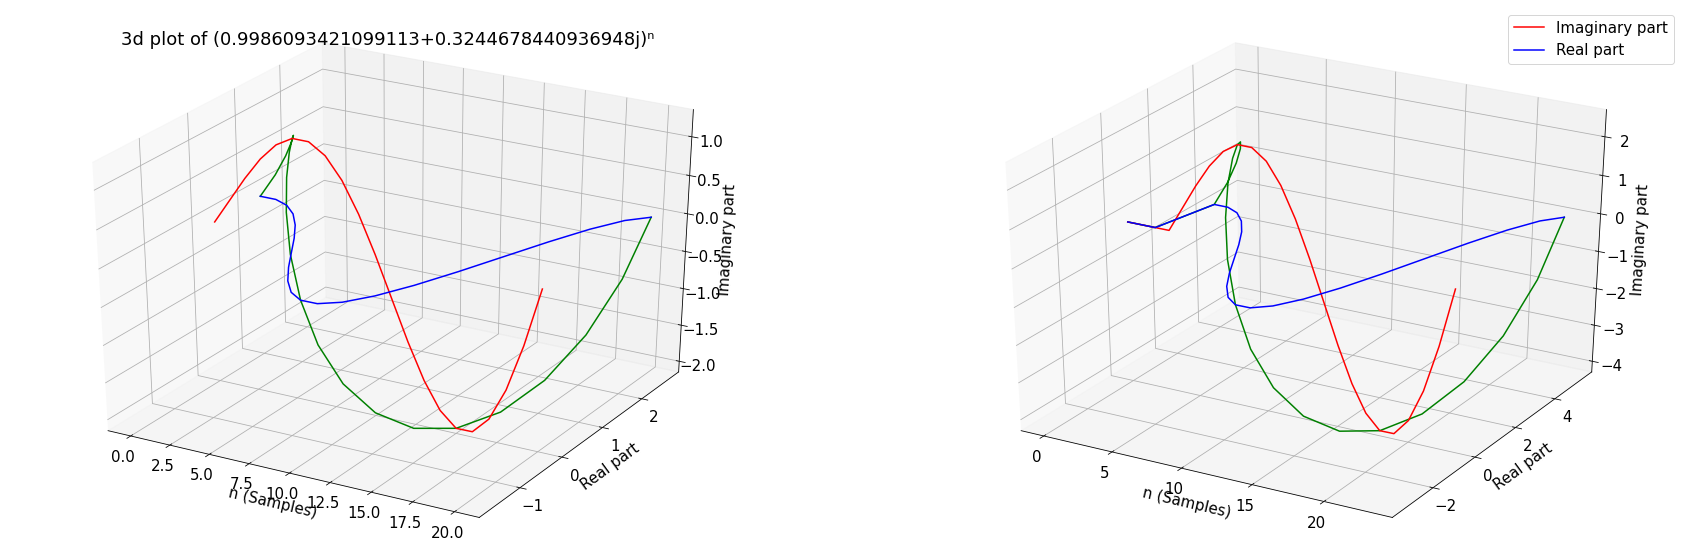

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Signature of Convolution.py
## Function for computing convolution of 2 sequences
def convolution(x, h):
  x = list(x)
  h = list(h)         #converting to lists
  if(len(x)<len(h)):  #taking the smaller of the two in h
    x,h=h,x

  ## Do something with inputSeq and impulseResponse
  ## Both are numpy arrays or list of numbers
  n=len(x)
  m=len(h)            #finding the lengths of the two lists
  L= n+2*(m-1)
  x=[0]*(m-1)+x+[0]*(m-1)
  h.reverse()         #reversing the 'h' list
  hRev=h+[0]*(n+m-2)  #converting each list to length = n+2(m-1) 

  leftLim=0
  rightLim=n+m-2    # length of output is n+m-1: [0 , n+m-2]
  y=[0]*(n+m-1)
  for i in range(leftLim,rightLim+1):   #filling up the output list one by one
    for j in range(L):                  #iterating over the input list and impulse_response list 
      y[i]=y[i]+(x[j]*hRev[j])
    hRev.pop()                          # hRev shifted rightwards by one after calculating each y[i]
    hRev=[0]+hRev
  return y

impulseResponse = [0,0,0,2]
rnge=20
n=np.arange(0,rnge+1,1)

for z in z_list:
  input=z**n
  Response=np.array(convolution(input,impulseResponse))
  nr=np.arange(0,len(Response),1)
  x=n
  rl=(z**n).real
  img=(z**n).imag
  # Creating figure
  plt.rcParams.update({'font.size':15})
  fig = plt.figure(figsize = (30,10))
  ax = fig.add_subplot(1, 2, 1, projection='3d')
  # Creating plot
  ax.plot3D(x, rl, img, color = "green")
  ax.plot3D(x, [0]*np.shape(n)[0], img, color = "red",label='Imaginary part')
  ax.plot3D(x, rl,0, color = "blue",label='Real part')
  ax.set_xlabel('n (Samples)')
  ax.set_ylabel(f'Real part')
  ax.set_zlabel(f'Imaginary part')
  plt.title(f'3d plot of {z}'+u'\u207F')


  ax = fig.add_subplot(1, 2, 2, projection='3d')
  ax.plot3D(nr, Response.real , Response.imag, color = "green")
  ax.plot3D(nr, [0]*np.shape(nr)[0], Response.imag, color = "red",label='Imaginary part')
  ax.plot3D(nr, Response.real,0, color = "blue",label='Real part')
  ax.set_xlabel('n (Samples)')
  ax.set_ylabel(f'Real part')
  ax.set_zlabel(f'Imaginary part')
  ax.legend()
  
  # show plot
  plt.show()




**Conclusion:**

The real and complex parts of all the inputs are shifted to the right by 3 samples. The eigen value of the system is 2z^-3.

In [65]:
for z in z_list:
  print(f'The eigen-value of the system y[n]=2x[n-3] for z={z} = ',end=' ')
  print(2*(z**-3))

The eigen-value of the system y[n]=2x[n-3] for z=(-2+3j) =  (0.041875284478834776-0.008192990441511151j)
The eigen-value of the system y[n]=2x[n-3] for z=(2-3j) =  (-0.041875284478834776+0.008192990441511151j)
The eigen-value of the system y[n]=2x[n-3] for z=(0.9510565162951535+0.3090169943749474j) =  (1.1755705045849467-1.618033988749895j)
The eigen-value of the system y[n]=2x[n-3] for z=(0.9035036904803958+0.2935661446562j) =  (1.3711275749642184-1.8871952048402338j)
The eigen-value of the system y[n]=2x[n-3] for z=(0.9986093421099113+0.3244678440936948j) =  (1.0155020015850955-1.3977185951840143j)


The eigen values of the response is the Z Transform of the impulse re-
sponse. This is also known as the transfer function denoted by H(z). Com-
pute the magnitude spectrum |H(z)| and the phase spectrum arg[H(z)]
and plot them in separate plots. Plot for the previous section by consid-
ering complex z values from last part.

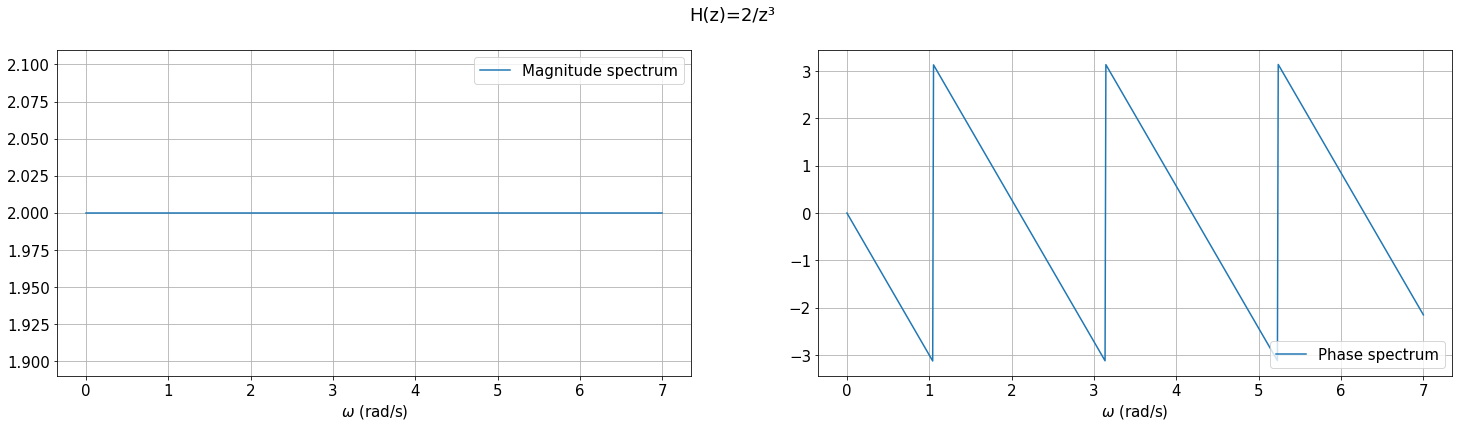

In [80]:
import numpy as np
import cmath
rnge=int(2*np.pi)+1
w=np.linspace(0,rnge,rnge*100)
c=[]
for i in w:
  c.append(complex(0,i))
c=np.array(c)
z=np.exp(c)
Hz=2/(z**3)
mag=abs(Hz)
ph=[]
for i in list(Hz):
  ph.append(cmath.phase(i))
ph=np.array(ph)


fig,ax=plt.subplots(1,2,figsize=(25,6))
plt.rcParams.update({'font.size':15})
ax[0].plot(w,mag,label='Magnitude spectrum')
ax[0].set_xlabel('$\omega$ (rad/s)')
ax[0].legend()
ax[0].grid()
ax[1].plot(w,ph,label='Phase spectrum')
ax[1].set_xlabel('$\omega$ (rad/s)')
ax[1].legend()
ax[1].grid()
plt.suptitle('H(z)=2/z'+u'\u00B3')

plt.show()

Magnitude is constant at 2. Phase is -3w. Since we are including muliple periods, we have multiple such straight lines.

In [87]:
for z in z_list:
  print(f'For z={z} (Polar form:{cmath.polar(z)}')
  print(f'Magnitude of H(z) ={2/(abs(z))**3}')
  print(f'Phase of H(z) ={cmath.phase(2/(z**3))} radians')
  print()

For z=(-2+3j) (Polar form:(3.605551275463989, 2.158798930342464)
Magnitude of H(z) =0.042669245863479165
Phase of H(z) =-0.193211483847806 radians

For z=(2-3j) (Polar form:(3.605551275463989, -0.982793723247329)
Magnitude of H(z) =0.042669245863479165
Phase of H(z) =2.948381169741987 radians

For z=(0.9510565162951535+0.3090169943749474j) (Polar form:(0.9999999999999999, 0.3141592653589793)
Magnitude of H(z) =2.000000000000001
Phase of H(z) =-0.9424777960769378 radians

For z=(0.9035036904803958+0.2935661446562j) (Polar form:(0.95, 0.3141592653589793)
Magnitude of H(z) =2.3327015599941685
Phase of H(z) =-0.9424777960769379 radians

For z=(0.9986093421099113+0.3244678440936948j) (Polar form:(1.05, 0.3141592653589793)
Magnitude of H(z) =1.727675197062952
Phase of H(z) =-0.9424777960769379 radians



Compute the Z Transform for the basic signals: δ[n], u[n], r[n], α n u[n],
nα n u[n], r n cos ω 0 nu[n]. Choose specific values for each and visualize the
magnitude and phase spectrums. Also plot the poles and zeros with the
ROC. For which values if any the Z Transform doesnot exist? Try finding
out the Z Transform outside the ROC.

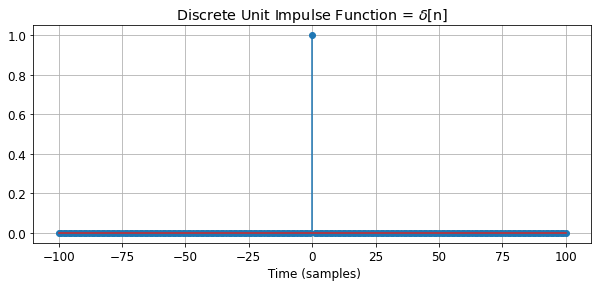

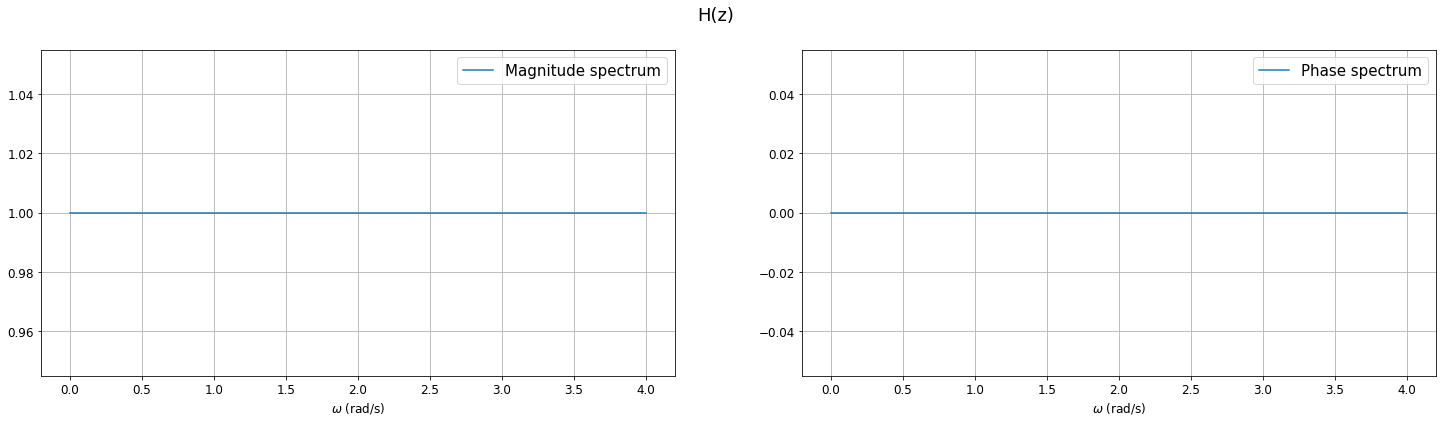

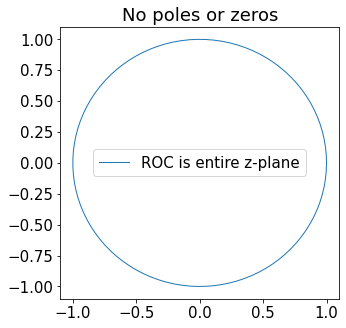

In [226]:
import matplotlib.pyplot as plt
import numpy as np
import cmath


def spectrum(x):
  rge=int(np.pi)+1
  w=np.linspace(0,rge,rge*100)
  c=[]
  for i in w:
    c.append(complex(0,i))
  c=np.array(c)
  z=np.exp(c)
  ZT=[]
  for i in list(z):
    sum=0
    rnge=100
    n=np.arange(-rnge,rnge+1,1)
    ZT.append(np.sum(np.multiply(np.array(x),(i**n))))

  Hz=np.array(ZT)  
  mag=abs(Hz)
  ph=[]
  for i in list(Hz):
    ph.append(cmath.phase(i))
  ph=np.array(ph)


  fig,ax=plt.subplots(1,2,figsize=(25,6))
  plt.rcParams.update({'font.size':15})
  ax[0].plot(w,mag,label='Magnitude spectrum')
  ax[0].set_xlabel('$\omega$ (rad/s)')
  ax[0].legend()
  ax[0].grid()
  ax[1].plot(w,ph,label='Phase spectrum')
  ax[1].set_xlabel('$\omega$ (rad/s)')
  ax[1].legend()
  ax[1].grid()
  plt.suptitle('H(z)')

  plt.show()


rnge=100
n=np.arange(-rnge,rnge+1,1)
plt.rcParams.update({'font.size':12})

# delta [n]
x1=[0]*rnge + [1] + [0]*rnge
plt.figure(figsize=(10,4))
plt.stem(n,x1,use_line_collection=True)
plt.xlabel(' Time (samples)')
plt.grid()
plt.title('Discrete Unit Impulse Function = $\delta$[n] ')
plt.show()
spectrum(x1)

plt.figure(figsize=(5,5))
theta = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(theta), np.sin(theta), linewidth=1,label='ROC is entire z-plane')
plt.legend()
plt.title('No poles or zeros')
plt.show()

**The Z-Transform for the following functions do not exist at the poles and 
outside the ROC. The value diverges. For the ROC, the unit circles are plotted.**

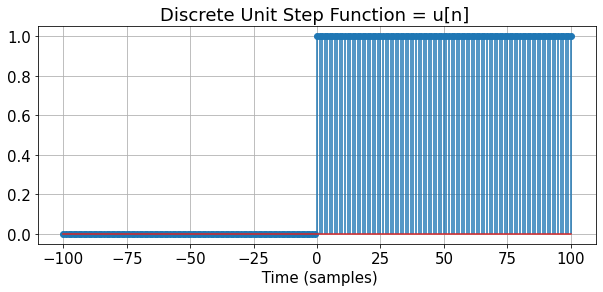

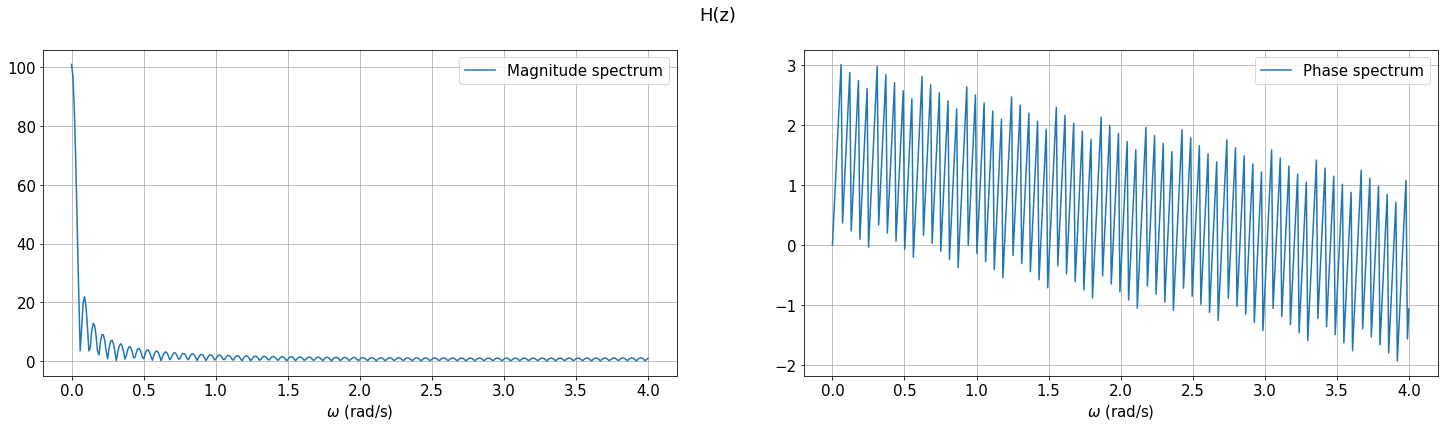

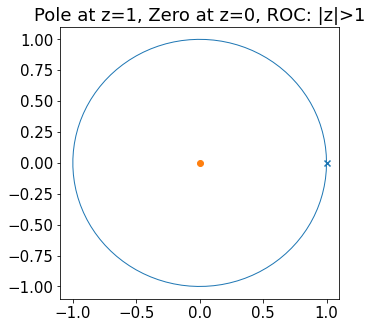

In [229]:
import matplotlib.pyplot as plt
import numpy as np
import math

zeroSamples=10
numSamples=10
rnge=100
n=np.arange(-rnge,rnge+1,1)


# UNIT STEP 
#t=np.linspace(-10,10,zeroSamples+numSamples)
x1=[]
for i in n:
  if(i<0):
    x1.append(0)
  else:
    x1.append(1)
plt.figure(figsize=(10,4))
plt.stem(n,x1,use_line_collection=True)
plt.xlabel(' Time (samples)')
plt.grid()
plt.title('Discrete Unit Step Function = u[n] ')
plt.show()
spectrum(x1)

plt.figure(figsize=(5,5))
theta = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(theta), np.sin(theta), linewidth=1)
plt.scatter(1,0,marker="x")
plt.scatter(0,0,marker="o")
plt.title('Pole at z=1, Zero at z=0, ROC: |z|>1')
plt.show()

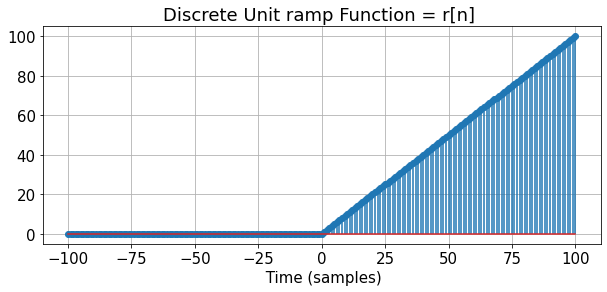

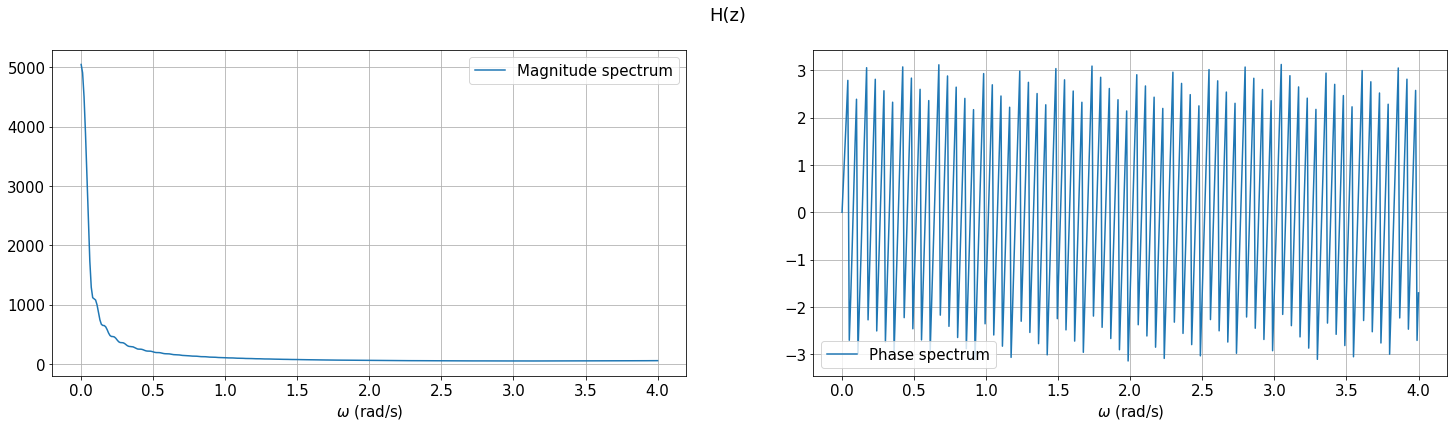

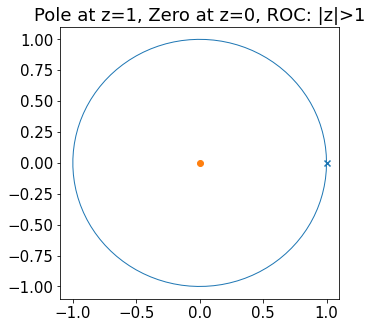

In [230]:

#UNIT RAMP
rnge=100
x2=[0 for i in range(rnge)]
for i in list(np.arange(0,rnge+1,1)):
  x2.append(i)

plt.figure(figsize=(10,4))
plt.stem(n,x2,use_line_collection=True)
plt.xlabel(' Time (samples)')
plt.grid()
plt.title('Discrete Unit ramp Function = r[n] ')
plt.show()
spectrum(x2)

plt.figure(figsize=(5,5))
theta = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(theta), np.sin(theta), linewidth=1)
plt.scatter(1,0,marker="x")
plt.scatter(0,0,marker="o")
plt.title('Pole at z=1, Zero at z=0, ROC: |z|>1')
plt.show()

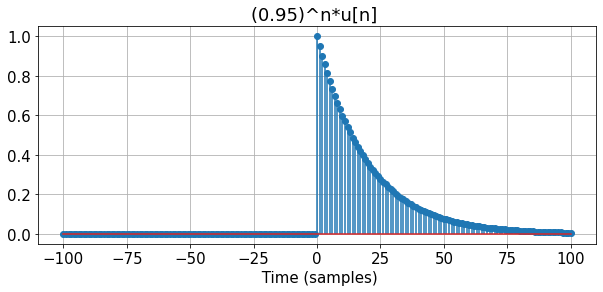

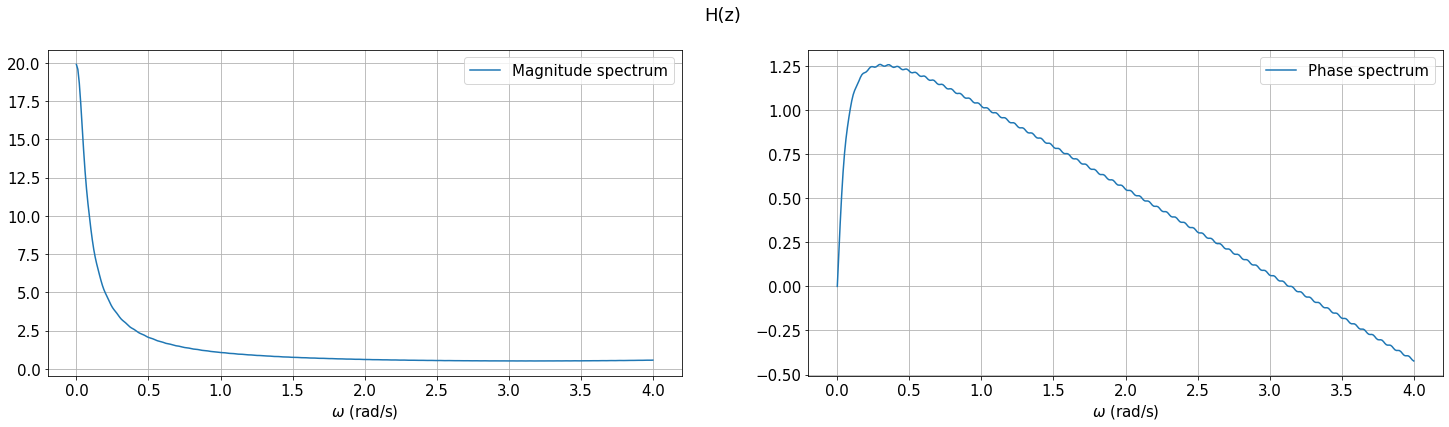

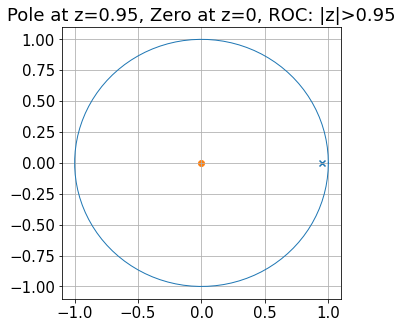

In [232]:
#a^n*u[n]
a=0.95
rnge=100
x2=[0 for i in range(rnge)]
for i in list(np.arange(0,rnge+1,1)):
  x2.append(a**i)

plt.figure(figsize=(10,4))
plt.stem(n,x2,use_line_collection=True)
plt.xlabel(' Time (samples)')
plt.grid()
plt.title('(0.95)^n*u[n] ')
plt.show()
spectrum(x2)

plt.figure(figsize=(5,5))
theta = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(theta), np.sin(theta), linewidth=1)
plt.scatter(0.95,0,marker="x")
plt.scatter(0,0,marker="o")
plt.grid()
plt.title('Pole at z=0.95, Zero at z=0, ROC: |z|>0.95')
plt.show()

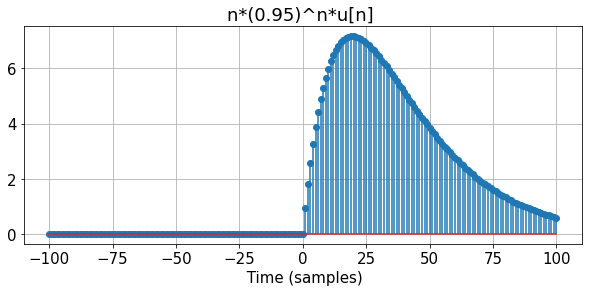

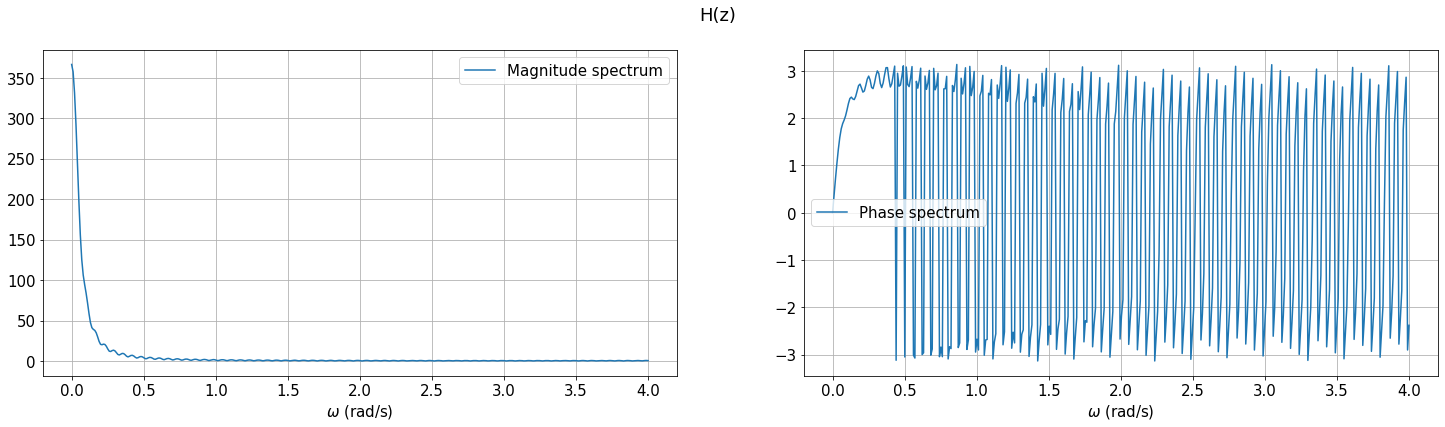

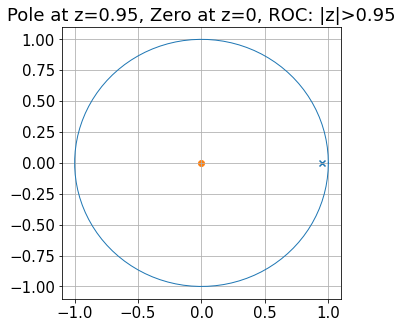

In [233]:
#a^n*u[n]
a=0.95
rnge=100
x2=[0 for i in range(rnge)]
for i in list(np.arange(0,rnge+1,1)):
  x2.append(i*(a**i))

plt.figure(figsize=(10,4))
plt.stem(n,x2,use_line_collection=True)
plt.xlabel(' Time (samples)')
plt.grid()
plt.title('n*(0.95)^n*u[n] ')
plt.show()
spectrum(x2)

plt.figure(figsize=(5,5))
theta = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(theta), np.sin(theta), linewidth=1)
plt.scatter(0.95,0,marker="x")
plt.scatter(0,0,marker="o")
plt.grid()
plt.title('Pole at z=0.95, Zero at z=0, ROC: |z|>0.95')
plt.show()

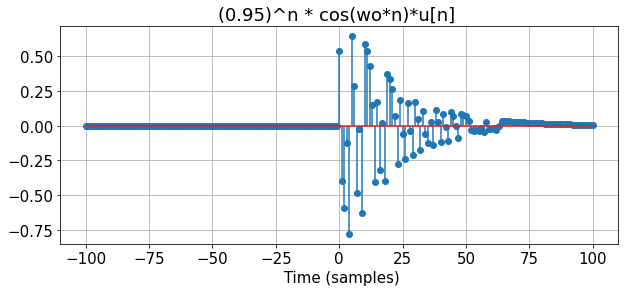

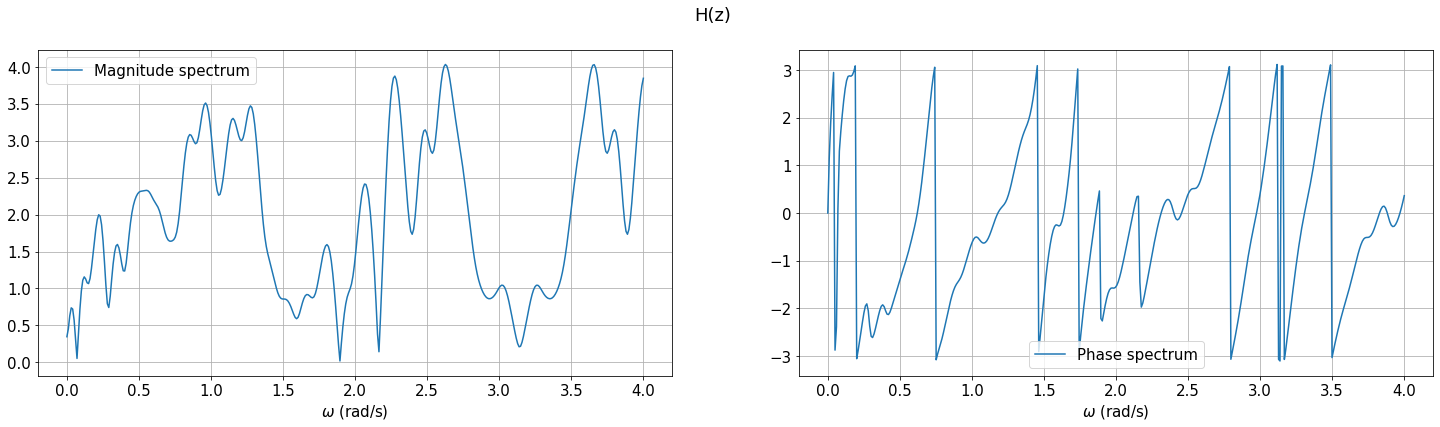

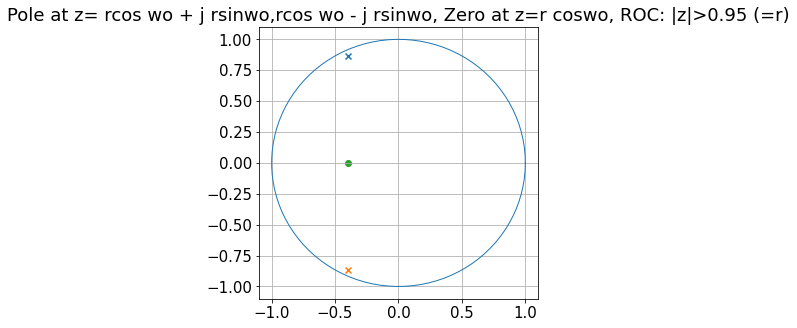

In [235]:
#a^n*u[n]
r=0.95
wo=2
rnge=100
x2=[0 for i in range(rnge)]
for i in list(np.arange(0,rnge+1,1)):
  x2.append((r**i) * np.cos(wo**i))

plt.figure(figsize=(10,4))
plt.stem(n,x2,use_line_collection=True)
plt.xlabel(' Time (samples)')
plt.grid()
plt.title('(0.95)^n * cos(wo*n)*u[n] ')
plt.show()
spectrum(x2)

plt.figure(figsize=(5,5))
theta = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(theta), np.sin(theta), linewidth=1)
a=r*np.cos(wo)
b=r*np.sin(wo)
plt.scatter(a,b,marker="x")
plt.scatter(a,-b,marker="x")
plt.scatter(a,0,marker="o")
plt.grid()
plt.title('Pole at z= rcos wo + j rsinwo,rcos wo - j rsinwo, Zero at z=r coswo, ROC: |z|>0.95 (=r)')
plt.show()

• Discrete Time Fourier Series: For a signal x[n] with fundamental
period N , the DTFS representation is as follows:
x[n] =
N
−1
X
a k e jk(2π/N )n
k=0
The DTFS coefficients are defined by following relation:
N −1
1 X
x[n]e −jk(2π/N )n
x[n] =
N n=0
The DTFS coefficients of a periodic discrete time signal with period N = 5
are given below:
a 0 = 1, a 2 = a ∗−2 = e jπ/4 , a 4 = a ∗−4 = 2e jπ/3
Using the properties of DTFS, determine the values of a 0 through a 4 .
Using these coefficients, determine one period of the signal and display a
labelled plot.

**ans** since fourier coefficients are periodic, a[3]=a[-2] and a[1]=a[-4]

Fourier coefficients:
[1, (1.0000000000000002-1.7320508075688772j), (0.7071067811865476+0.7071067811865475j), (0.7071067811865476-0.7071067811865475j), (1.0000000000000002+1.7320508075688772j)]

Reconstructed signal values:
[(4.414213562373095+0j), (2.937213721744947-5.551115123125783e-17j), (3.200126901447349-6.661338147750939e-16j), (-3.5621628300494974+3.3306690738754696e-16j), (-1.9893913555158946+8.881784197001252e-16j)]


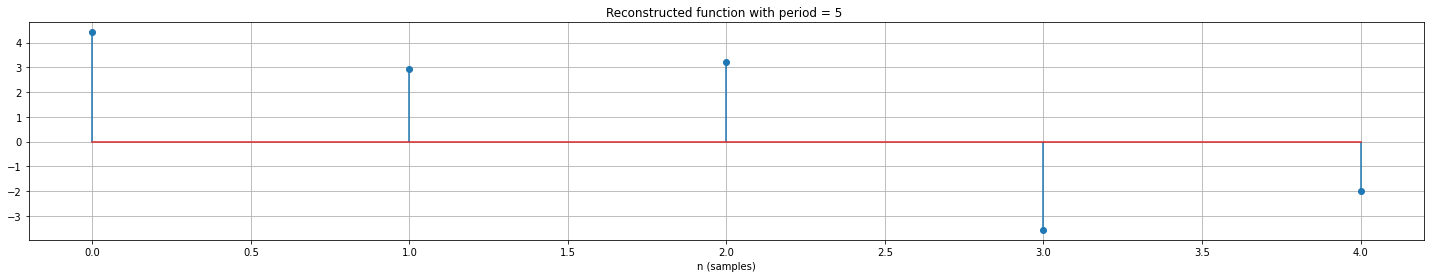

In [10]:
import numpy as np
import cmath 
import matplotlib.pyplot as plt

p=np.cos(np.pi/3)
q=np.sin(np.pi/3)
r=np.cos(np.pi/4)
s=np.sin(np.pi/4)

a0=1
a1=2*complex(p,-q)
a2=complex(r,s)
a3=complex(r,-s)
a4=2*complex(p,q)

dfs_coeff=[a0,a1,a2,a3,a4]
N=5
num_coeff=N
twiddle_power=complex(0,-(2*np.pi)/N)
Wn=np.exp(twiddle_power)

x_hat=[]
for i in range(N):
  sum=0
  for k in range(num_coeff):
    sum=sum+(dfs_coeff[k]*(Wn**(-(i*k))))
  x_hat.append(sum)

print('Fourier coefficients:')
print(dfs_coeff)
print()
print('Reconstructed signal values:')
print(x_hat)

plt.figure(figsize=(25,4))
plt.stem(np.arange(0,len(x_hat),1),np.array(x_hat).real,use_line_collection=True)
plt.xlabel('n (samples)')
plt.title(f'Reconstructed function with period = {N} ')
plt.grid()

plt.show()

Consider a periodic square wave with fundamental period N = 16 having
magnitude 1 between n = 0 and n = 7 and zero elsewhere. Make a plot
of this signal over two periods in blue colour.

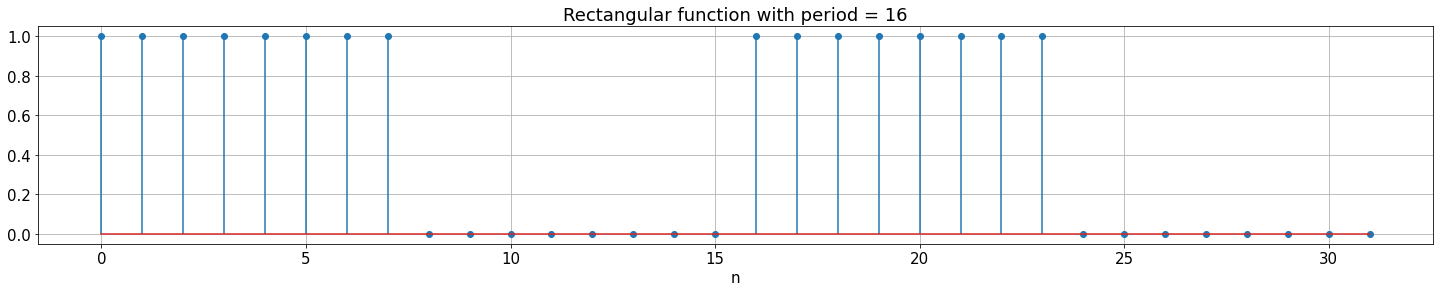

In [90]:
import numpy as np
import matplotlib.pyplot as plt

N=16
rnge=2*N
n=np.arange(0,rnge,1)
rect=[]
for i in list(n):
  if (i%16)<8:
    rect.append(1)
  else:
    rect.append(0)
plt.figure(figsize=(25,4))
plt.stem(n,rect,use_line_collection=True)
plt.xlabel('n')
plt.title(f'Rectangular function with period = {N}')
plt.grid()
plt.show()



Determine the DTFS coefficients of this signal and generate magnitude
plots of the coefficients.

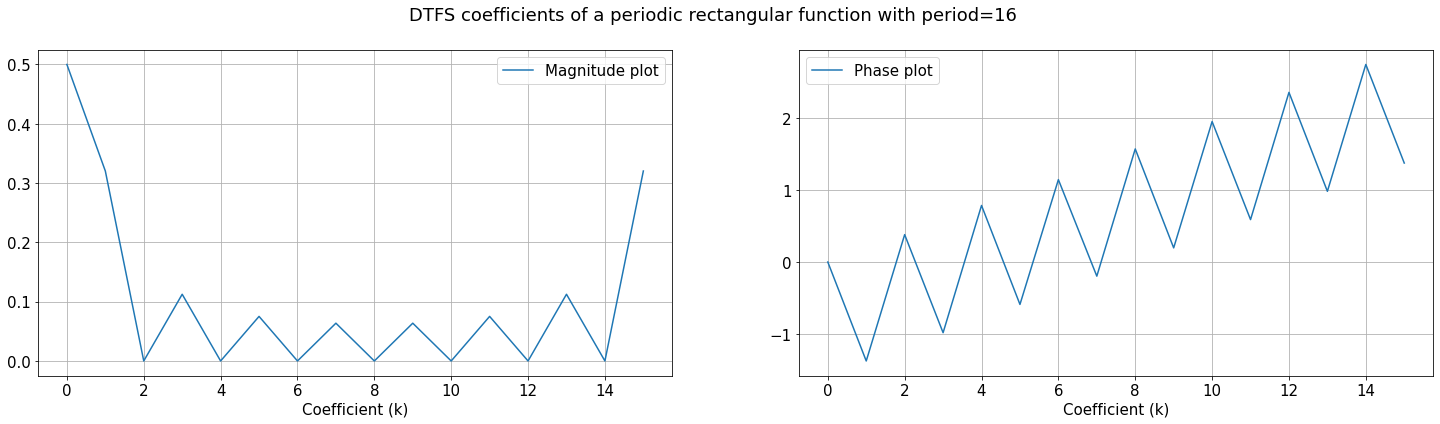

In [117]:
N=16
num_coeff=N
twiddle_power=complex(0,-(2*np.pi)/N)
Wn=np.exp(twiddle_power)
n=np.arange(0,N-1,1)



def dfs(x,N,num_coeff,Wn):
  dfs_coeff=[]
  for k in range(num_coeff):
    sum=0
    for i in range(N):
      sum=sum+(x[i]*(Wn**(i*k)))
    dfs_coeff.append(sum)

  dfs_coeff=np.array(dfs_coeff)/N
  return dfs_coeff


dfs_coeff=dfs(rect,N,num_coeff,Wn)
mag=abs(dfs_coeff)
ph=[]
for i in list(dfs_coeff):
  ph.append(cmath.phase(i))
ph=np.array(ph)

fig,ax=plt.subplots(1,2,figsize=(25,6))
plt.rcParams.update({'font.size':15})
ax[0].plot(np.arange(0,num_coeff,1),mag,label='Magnitude plot')
ax[0].set_xlabel('Coefficient (k)')
ax[0].legend()
ax[0].grid()
ax[1].plot(np.arange(0,num_coeff,1),ph,label='Phase plot')
ax[1].set_xlabel('Coefficient (k)')
ax[1].legend()
ax[1].grid()
plt.suptitle('DTFS coefficients of a periodic rectangular function with period=16')

plt.show()

Using the coefficients determined above, make an approximate reconstruc-
tion of the square wave and display it on the plot of the original signal in
red colour.

In [114]:
x_hat=[]
for i in range(N):
  sum=0
  for k in range(num_coeff):
    sum=sum+(dfs_coeff[k]*(Wn**(-(i*k))))
  x_hat.append(sum)

print('Reconstructed signal values:')
print(x_hat)


Reconstructed signal values:
[(1.0000000000000009+8.881784197001252e-16j), (1.0000000000000007+6.106226635438361e-16j), (1.0000000000000013+3.0531133177191805e-16j), (1.000000000000001+1.3877787807814457e-17j), (1.0000000000000009-2.5673907444456745e-16j), (1.0000000000000009-5.273559366969494e-16j), (1.0000000000000009-6.661338147750939e-16j), (1.0000000000000013-1.3322676295501878e-15j), (-1.547373340571312e-15-1.1102230246251565e-15j), (-1.3600232051658168e-15-7.216449660063518e-16j), (-6.106226635438361e-16-6.938893903907228e-16j), (-6.106226635438361e-16-5.551115123125783e-16j), (-1.7763568394002505e-15-3.2959746043559335e-15j), (-4.996003610813204e-16-8.604228440844963e-16j), (-3.858025010572419e-15-2.3314683517128287e-15j), (-3.184952301893418e-15-3.885780586188048e-16j)]


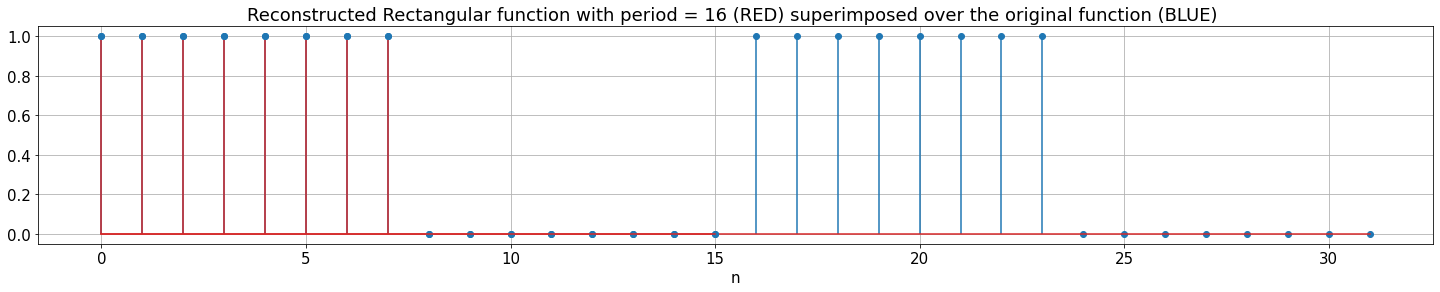

In [113]:
plt.figure(figsize=(25,4))
plt.stem(np.arange(0,len(rect),1),rect,use_line_collection=True)
plt.xlabel('n')
plt.title(f'Reconstructed Rectangular function with period = {N} (RED) superimposed over the original function (BLUE) ')
plt.grid()

plt.stem(np.arange(0,N,1),np.array(x_hat).real,use_line_collection=True, linefmt='C3')
plt.show()

• Continuous Time Fourier Transform: Consider a rectangular signal
with amplitude 5 and existing between t = −1 and t = 1. Compute
the continuous time Fourier transform of this signal and display a nicely
labelled plot.

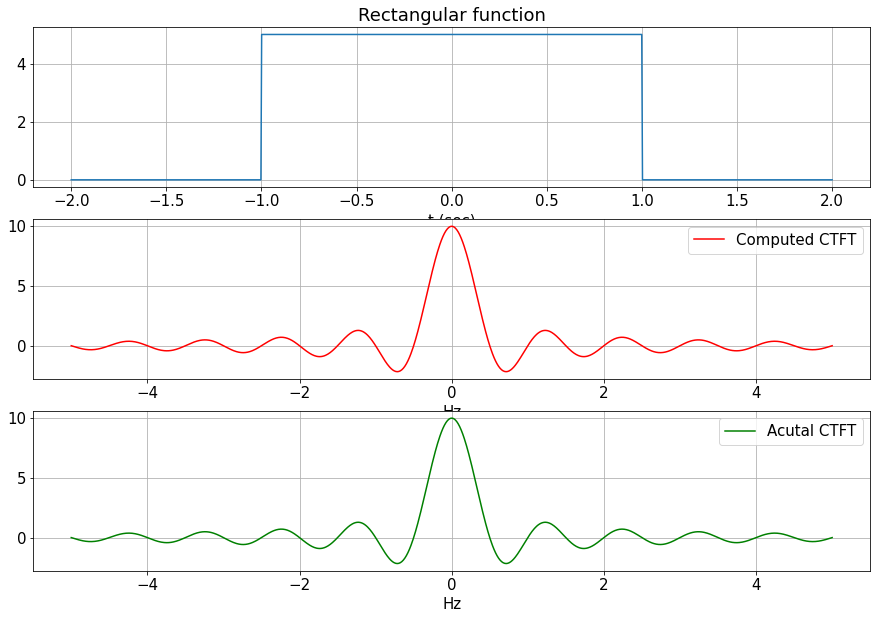

In [179]:
N=4000
num_coeff=4000
t=np.linspace(-2,2,N)

'''
c_rect=[]
for i in list(t):
  if abs(i)<=1:
    c_rect.append(5)
  else:
    c_rect.append(0)
f = np.linspace(-5, 5, 1000)

dfs_coeff=dfs(c_rect,N,num_coeff,Wn)

x_hat=[]
for i in range(N):
  sum=0
  for k in range(num_coeff):
    sum=sum+(dfs_coeff[k]*(Wn**(-(i*k))))
  x_hat.append(sum)

plt.plot(list(range(400)),dfs_coeff)
'''


def integ(f, a, b):   # integrate f over the range (a,b) 
    from scipy import integrate 
    t = np.linspace(a, b,len(f))  
    x = f(t)
    return integrate.simps(y=x, x=t)


def cft(g, f):
    result = np.zeros(len(f), dtype=complex)
    for i, freq in enumerate(f):   
        result[i] = integ(lambda t: g(t)*np.exp(-2j*np.pi*freq*t), -2, 2)  #calculate ctft for all the frequencies
    return result


def rect(t):
    return 5*(abs(t) < 1).astype(float)

t = np.linspace(-2,2, 1000)
f = np.linspace(-5, 5, 1000)
R = cft(rect, f)  # Calculate the ctft


plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(t, rect(t))
plt.grid()
plt.xlabel('t (sec)')
plt.title('Rectangular function')

plt.subplot(312)
plt.plot(f, R.real, 'r', label='Computed CTFT')
plt.xlabel('Hz')
plt.grid()
plt.legend()

plt.subplot(313)
plt.plot(f, 5*np.sin(2*np.pi*f)/(np.pi*f), 'g', label='Acutal CTFT')
plt.xlabel('Hz')
plt.grid()
plt.legend()
plt.show()

A message signal m(t) is used to modulate a carrier signal c(t) = cos2πf c t
and the resultant signal is given by y(t) = m(t)c(t). Plot y(t).
Compute the Fourier transform of m(t) and y(t) and display the plots.
m(t) is a triangular signal existing between t = −1 and t = 1 with a peak
amplitude of 1.

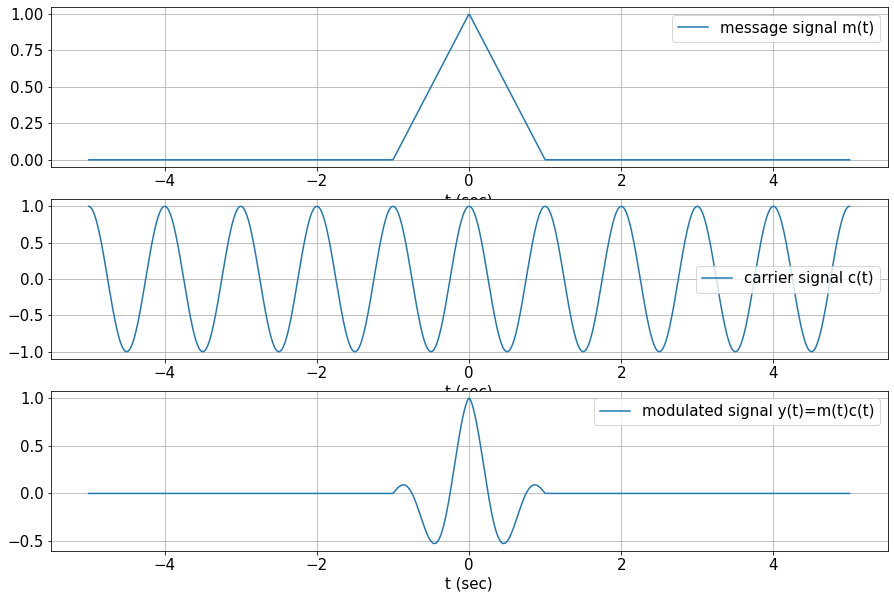

In [173]:
def triang(t):
  f=[]
  for i in list(t):
    if(abs(i)<1):
      f.append(1-abs(i))
    else:
      f.append(0)
  return np.array(f)

fc=1000000
t=np.linspace(-5,5,1000)
mes=triang(t)
car=np.cos(2*np.pi*fc*t)
modulated=mes*car

plt.figure(figsize=(15,10))

plt.subplot(311)
plt.plot(t,mes,label='message signal m(t)')
plt.xlabel('t (sec)')
plt.grid()
plt.legend()

plt.subplot(312)
plt.plot(t,car,label='carrier signal c(t)')
plt.xlabel('t (sec)')
plt.grid()
plt.legend()

plt.subplot(313)
plt.plot(t,modulated,label='modulated signal y(t)=m(t)c(t)')
plt.xlabel('t (sec)')
plt.grid()
plt.legend()
plt.show()

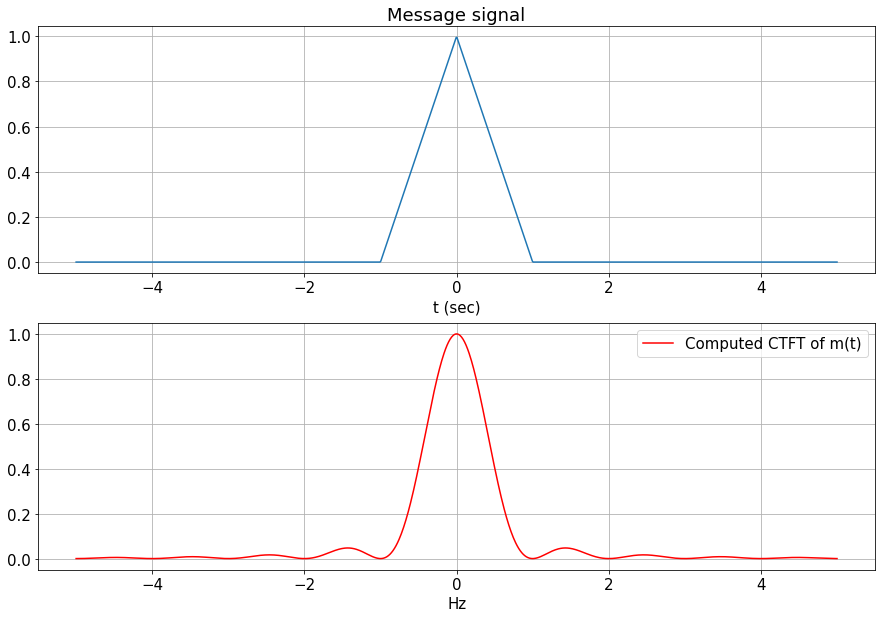

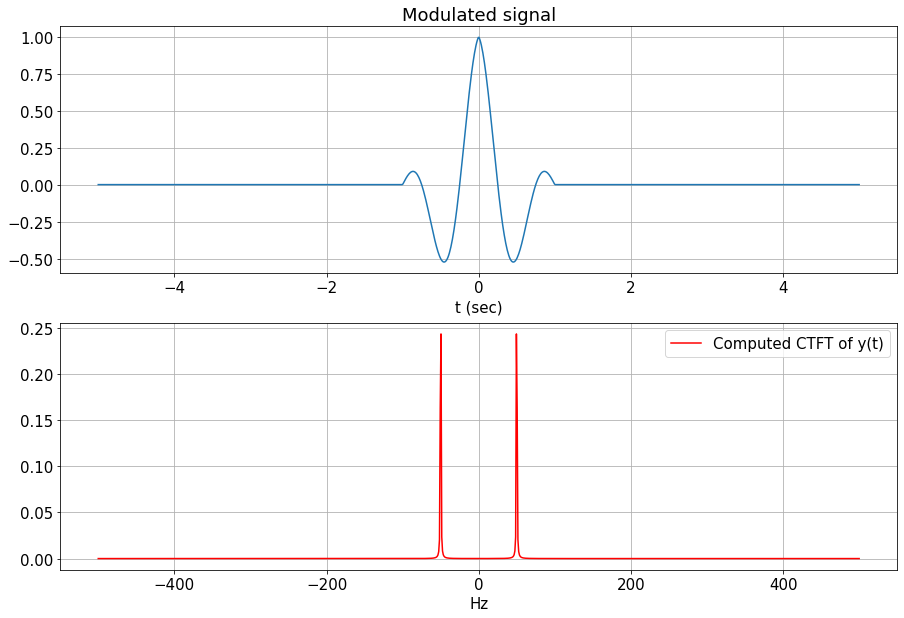

In [192]:
f = np.linspace(-5, 5, 1000)
R = cft(triang, f)  # Calculate the ctft

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(np.linspace(-5,5,1000),mes )
plt.grid()
plt.xlabel('t (sec)')
plt.title('Message signal')

plt.subplot(212)
plt.plot(f, R.real, 'r', label='Computed CTFT of m(t)')
plt.xlabel('Hz')
plt.grid()
plt.legend()

plt.show()


def modulated_signal(t):
  fc=1000000
  return (np.cos(2*np.pi*fc*t)*triang(t))

f = np.linspace(-500, 500, 1000)
R = cft(modulated_signal, f)  # Calculate the ctft
t=np.arange(-2,2,400)

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(np.linspace(-5,5,1000), modulated)
plt.grid()
plt.xlabel('t (sec)')
plt.title('Modulated signal')

plt.subplot(212)
plt.plot(f, R.real, 'r', label='Computed CTFT of y(t)')
plt.xlabel('Hz')
plt.grid()
plt.legend()

plt.show()


**How to obtain Triangular function from that of rectangular function?**

Convolution of two same width rectangular pulses give a triangular pulse.

**How to obtain Fourier transform of Triangular function from that of rectangular function?**




tri(t/T) = 1-|t|/T for t<=T and 0 otherwise

rect(t/T) = 1 for -T/2<=t<=T/2 and 0 otherwise

Fourier transform of rect(t/T) is T*sinc(fT).

In Fourier transformed domain, convolution becomes multiplication. Since triangular pulse is convolution of two rectangular pulses, its fourier transform can also be easily computed.

Fourier transform of tri(t/T) is T*(sinc(fT))^2 (not T^2 since we have to adjust for the scaling factor 1/T). 